# <center> Сборный проект -2 </center>

## <center> 1. Предсказание уровня удовлетворённости клиента</center>

### <center> 1. Загрузка данных. </center>

In [58]:
# !pip install --upgrade scikit-learn==1.4.1.post1
# !pip install phik

# Импортируем необходимые библиотеки 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
# import plotly.graph_objects as go
from plotly.subplots import make_subplots



import scipy.stats as st
import numpy as np
import scipy as sp
import math
import phik

from sklearn.linear_model import ElasticNet
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.dummy import DummyRegressor,  DummyClassifier

from sklearn.metrics import (
    roc_auc_score,
    make_scorer,
    )

from sklearn.preprocessing import (
    StandardScaler,
    OneHotEncoder,
    LabelEncoder,
    OrdinalEncoder              
)

from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


import warnings
import time

RANDOM_STATE = 50

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)


1. Загрузим данные :
- `train_job_satisfaction_rate.csv` -тренировочная выборка;
- `test_features.csv` - входные данные тестовой выборки;
- `test_target_job_satisfaction_rate.csv` - целевой признак тестовой выборки.
2. Ознокомимся с загруженными данными.

In [59]:
try:
    df_train_job = pd.read_csv('/datasets/train_job_satisfaction_rate.csv')
    df_test_job = pd.read_csv('/datasets/test_features.csv')
    df_target_job = pd.read_csv('/datasets/test_target_job_satisfaction_rate.csv')
except:
    df_train_job = pd.read_csv('train_job_satisfaction_rate.csv')
    df_test_job = pd.read_csv('test_features.csv')
    df_target_job = pd.read_csv('test_target_job_satisfaction_rate.csv')

In [60]:
df_train_job.head()

id        dept   level workload  employment_years last_year_promo  \
0  155278       sales  junior   medium                 2              no   
1  653870          hr  junior     high                 2              no   
2  184592       sales  junior      low                 1              no   
3  171431  technology  junior      low                 4              no   
4  693419          hr  junior   medium                 1              no   

  last_year_violations  supervisor_evaluation  salary  job_satisfaction_rate  
0                   no                      1   24000                   0.58  
1                   no                      5   38400                   0.76  
2                   no                      2   12000                   0.11  
3                   no                      2   18000                   0.37  
4                   no                      3   22800                   0.20

In [61]:
df_train_job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


In [62]:
df_test_job.head()

id       dept   level workload  employment_years last_year_promo  \
0  485046  marketing  junior   medium                 2              no   
1  686555         hr  junior   medium                 1              no   
2  467458      sales  middle      low                 5              no   
3  418655      sales  middle      low                 6              no   
4  789145         hr  middle   medium                 5              no   

  last_year_violations  supervisor_evaluation  salary  
0                   no                      5   28800  
1                   no                      4   30000  
2                   no                      4   19200  
3                   no                      4   19200  
4                   no                      5   40800

In [63]:
df_test_job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


In [64]:
df_target_job.head()

id  job_satisfaction_rate
0  130604                   0.74
1  825977                   0.75
2  418490                   0.60
3  555320                   0.72
4  826430                   0.08

In [65]:
df_target_job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


### <center> 2. Предобработка данных. </center>

#### Предобработка датафрейма `df_train_job`.

Выведем строки `df_train_job` с пропусками.

In [66]:
df_train_job[df_train_job.isna().any(axis=1)]

id   dept   level workload  employment_years last_year_promo  \
1209  631073  sales     NaN   medium                 1              no   
1469  416327  sales     NaN      low                 1              no   
1526  694746    NaN  junior   medium                 5              no   
1630  814624    NaN  junior   medium                 3              no   
1633  475114    NaN  junior     high                 4              no   
1745  135043  sales     NaN   medium                 1              no   
2522  998838  sales     NaN   medium                 1              no   
2781  497243    NaN  junior   medium                 1              no   
2975  168668    NaN  junior      low                 3              no   
3866  641150    NaN  junior      low                 3              no   

     last_year_violations  supervisor_evaluation  salary  \
1209                   no                      4   27600   
1469                   no                      5   18000   
1526                   no                      4   21600   
1630                   no                      4   24000   
1633                   no                      4   31200   
1745                   no                      3   26400   
2522                   no                      5   27600   
2781                   no                      3   26400   
2975                   no                      4   18000   
3866                  yes                      4   12000   

      job_satisfaction_rate  
1209                   0.66  
1469                   0.73  
1526                   0.62  
1630                   0.88  
1633                   0.63  
1745                   0.30  
2522                   0.71  
2781                   0.28  
2975                   0.88  
3866                   0.54

Заполним пропуски в категориальных признаках `dept`и `workload` в пайплайне, используя **SimpleImputer**.

In [67]:
# columns_cat список категориальных столбцов.
columns_cat = df_train_job.select_dtypes(include='object').columns
columns_cat

Index(['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations'], dtype='object')

In [68]:
one_pipe_imputer = Pipeline(
    [
        ('simple_imputer', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]     
)    
one_pipe_imputer

Pipeline(steps=[('simple_imputer', SimpleImputer(strategy='most_frequent'))])

In [69]:
df_train_job_transform = one_pipe_imputer.fit_transform(df_train_job[columns_cat])

columns = one_pipe_imputer.get_feature_names_out()

In [70]:
df_train_job[columns_cat]= pd.DataFrame(df_train_job_transform, columns= columns)
df_train_job.head()

id        dept   level workload  employment_years last_year_promo  \
0  155278       sales  junior   medium                 2              no   
1  653870          hr  junior     high                 2              no   
2  184592       sales  junior      low                 1              no   
3  171431  technology  junior      low                 4              no   
4  693419          hr  junior   medium                 1              no   

  last_year_violations  supervisor_evaluation  salary  job_satisfaction_rate  
0                   no                      1   24000                   0.58  
1                   no                      5   38400                   0.76  
2                   no                      2   12000                   0.11  
3                   no                      2   18000                   0.37  
4                   no                      3   22800                   0.20

In [71]:
print(f'Значения, на которые были заменены пропуски:{one_pipe_imputer.named_steps["simple_imputer"].statistics_[1:3]}')
print(f'Количество строк с пропуcками: { df_train_job.isna().any(axis=1).sum()}')

Значения, на которые были заменены пропуски:['junior' 'medium']
Количество строк с пропуcками: 0


In [72]:
df_train_job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   4000 non-null   object 
 2   level                  4000 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


Проверим датафрем на наличие дубликатов, неполных дубликатов( без столбца 'id')  и категориальные данные на неявные дубликаты.

In [73]:
print(f'Количество явных дубликатов: { df_train_job.duplicated().sum()}')
print(f'Количество явных неполных дубликатов,без "id": { df_train_job.drop("id",axis=1).duplicated().sum()}')
for col in df_train_job.select_dtypes(include='object').columns:
    print(f'Список уникальных значений в столбце {col} : {df_train_job[col].unique()}')
 

Количество явных дубликатов: 0
Количество явных неполных дубликатов,без "id": 248
Список уникальных значений в столбце dept : ['sales' 'hr' 'technology' 'purchasing' 'marketing']
Список уникальных значений в столбце level : ['junior' 'middle' 'sinior']
Список уникальных значений в столбце workload : ['medium' 'high' 'low']
Список уникальных значений в столбце last_year_promo : ['no' 'yes']
Список уникальных значений в столбце last_year_violations : ['no' 'yes']


Обнаружены неполные дубликаты. Прежде чем передать данные в модель,  удалим дубликаты на этапе подготовки.

Датафрейм `df_train_job` подготовлен к исследовательскому анализу.

In [74]:
df_train_job['level'] = df_train_job['level'].where (df_train_job['level'] !='sinior','senior')
df_train_job['level'].unique()

array(['junior', 'middle', 'senior'], dtype=object)

#### Предобработка датафрейма `df_test_job`.

Выведем строки `df_test_job` с пропусками.

In [75]:
df_test_job[df_test_job.isna().any(axis=1)]

id   dept   level workload  employment_years last_year_promo  \
191   609865    NaN  junior   medium                 1              no   
312   471990  sales     NaN      low                 1              no   
1196  832342    NaN  junior   medium                 1              no   

     last_year_violations  supervisor_evaluation  salary  
191                    no                      1   20400  
312                    no                      3   12000  
1196                   no                      4   28800

Исправим слово sinior на senior в столбце `level`

In [76]:
df_test_job['level'] = df_test_job['level'].where (df_test_job['level'] !='sinior','senior')
df_test_job['level'].unique()

array(['junior', 'middle', 'senior', nan], dtype=object)

Заполним пропуски в категориальных признаках `dept`и `workload` в пайплайне , используя **SimpleImputer**.

In [77]:
df_test_job_transform = one_pipe_imputer.transform(df_test_job[columns_cat])

columns = one_pipe_imputer.get_feature_names_out()

In [78]:
df_test_job[columns_cat]= pd.DataFrame(df_test_job_transform, columns= columns)
df_test_job.head()

id       dept   level workload  employment_years last_year_promo  \
0  485046  marketing  junior   medium                 2              no   
1  686555         hr  junior   medium                 1              no   
2  467458      sales  middle      low                 5              no   
3  418655      sales  middle      low                 6              no   
4  789145         hr  middle   medium                 5              no   

  last_year_violations  supervisor_evaluation  salary  
0                   no                      5   28800  
1                   no                      4   30000  
2                   no                      4   19200  
3                   no                      4   19200  
4                   no                      5   40800

In [79]:
print(f'Значения, на которые были заменены пропуски:{one_pipe_imputer.named_steps["simple_imputer"].statistics_[1:3]}')
print(f'Количество строк с пропуcками: { df_test_job.isna().any(axis=1).sum()}')

Значения, на которые были заменены пропуски:['junior' 'medium']
Количество строк с пропуcками: 0


In [80]:
df_test_job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   2000 non-null   object
 2   level                  2000 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


Проверим датафрем на наличие дубликатов и категориальные данные на неявные дубликаты.

In [81]:
print(f'Количество явных дубликатов: { df_test_job.duplicated().sum()}')
print(f'Количество явных неполных  дубликатов: { df_test_job.drop("id",axis=1).duplicated().sum()}')
for col in df_test_job.select_dtypes(include='object').columns:
    print(f'Список уникальных значений в столбце {col} : {df_test_job[col].unique()}')
 

Количество явных дубликатов: 0
Количество явных неполных  дубликатов: 560
Список уникальных значений в столбце dept : ['marketing' 'hr' 'sales' 'purchasing' 'technology' ' ']
Список уникальных значений в столбце level : ['junior' 'middle' 'senior']
Список уникальных значений в столбце workload : ['medium' 'low' 'high' ' ']
Список уникальных значений в столбце last_year_promo : ['no' 'yes']
Список уникальных значений в столбце last_year_violations : ['no' 'yes']


Явные полные и неявные дубликаты не обнаружены.
Неполные явные дубликаты в тестовых данных дополнительно обрабатывать не будем, в обучении модели они не участвуют, характер их появления требует уточнения.
В столбцах `dept`и `workload` встречаются значения пустой строки ''.
Обоаботаем их на этапе подготовки данных.

Предобработка `df_target_job` не требуется.

В результате предобрабтки данных были заполнены пропуски в таблицах `df_train_job` и `df_test_job`
Убедились в отстутствии дубликатов в том числе неявных и соответствии типов данных ожидаемым.

Датафремы: `df_train_job`, `df_test_job`, `df_target_job` подготовлены для дальнейшего анализ данных.


### <center> 3. Исследовательский анализ данных. </center>

Исследовательский анализ датафрема `df_train_job`

In [82]:
df_train_job.head()

id        dept   level workload  employment_years last_year_promo  \
0  155278       sales  junior   medium                 2              no   
1  653870          hr  junior     high                 2              no   
2  184592       sales  junior      low                 1              no   
3  171431  technology  junior      low                 4              no   
4  693419          hr  junior   medium                 1              no   

  last_year_violations  supervisor_evaluation  salary  job_satisfaction_rate  
0                   no                      1   24000                   0.58  
1                   no                      5   38400                   0.76  
2                   no                      2   12000                   0.11  
3                   no                      2   18000                   0.37  
4                   no                      3   22800                   0.20

Создадим функцию для построения гистограммы и графика боксплот.

In [83]:
# data масиив значений для построения, gist_titl, box_titl - названия графиков,
# gist_x, gist_y-названия осей гистограммы,  gist_x,gist_y- названия осей для боксплота,
#total_titl - общее название фигуры, bin- количество ведер в гистограмме

def gist_box (data, gist_titl='Gist', gist_x ='x',gist_y='частота',
                     box_titl='Box', box_x = 'x',   box_y='у',  total_titl='total',bin=10):


# Создание гистограммы.
    # fig_hist = go.Figure(go.Histogram(x=data, xbins=dict(size=bin)))
    fig_hist = px.histogram(x=data, nbins=bin)

    # Создание боксплота.
    # fig_box = go.Figure(go.Box(y=data))
    fig_box = px.box(y=data)
# Создание фигуры и размещение на ней графиков.
    fig = make_subplots(rows=1, cols=2,subplot_titles=(gist_titl, box_titl) )

    fig.add_trace(fig_hist.data[0], row=1, col=1)
    fig.add_trace(fig_box.data[0], row=1, col=2)

# Установка общего заголовка для фигуры, названия осей.
    fig.update_layout(title=total_titl,title_font_size=20)
    fig.update_xaxes(title_text=gist_x, row=1, col=1)
    fig.update_xaxes(title_text=box_x, row=1, col=2)
    fig.update_yaxes(title_text=gist_y, row=1, col=1)
    fig.update_yaxes(title_text=box_y, row=1, col=2)
    
# Отображение фигуры
    fig.show()

Расчитаем описательные статистики для числовых данных  методом .describe(), построим для каждого признака гистограмму  и боксплот.  
Признаки `supervisor_evaluation` , оценивающий качество работы сотрудника и `employment_years`, являются 
дискретными признакими.

In [84]:
df_train_job.drop(labels=['id','supervisor_evaluation','employment_years'], axis=1).describe().round(2)

salary  job_satisfaction_rate
count   4000.0                4000.00
mean   33926.7                   0.53
std    14900.7                   0.23
min    12000.0                   0.03
25%    22800.0                   0.36
50%    30000.0                   0.56
75%    43200.0                   0.71
max    98400.0                   1.00

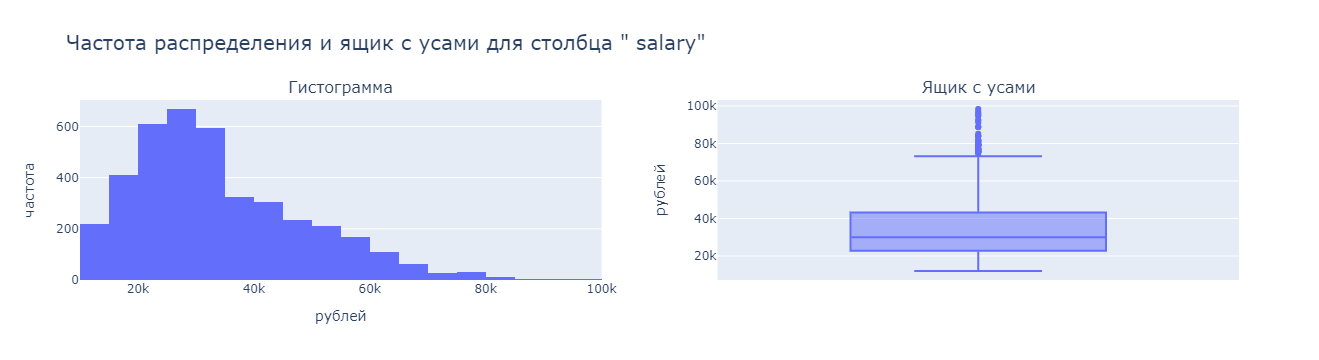

In [85]:

gist_box(data=df_train_job['salary'], gist_titl='Гистограмма',box_titl='Ящик с усами',
         gist_x='рублей',box_y='рублей',box_x='',
         total_titl=' Частота распределения и ящик с усами для столбца " salary"',bin=30)
         

1. Диапазон значений `salary` варьируется от 12000 до 98400. 
2. Медиана и среднее  равны соответственно 30000 и 33926.
3. Стандартное отклонение составляет 14900.
4. На боксплоте можно наблюдать  выбросы вверх со значения 74400. Значения выбросов укладываются в логику
 признака и обработки не требуют.


Построим  гистаграмму и боксплот для cтолбца `job_satisfaction_rate`, являющегося целевым признаком.

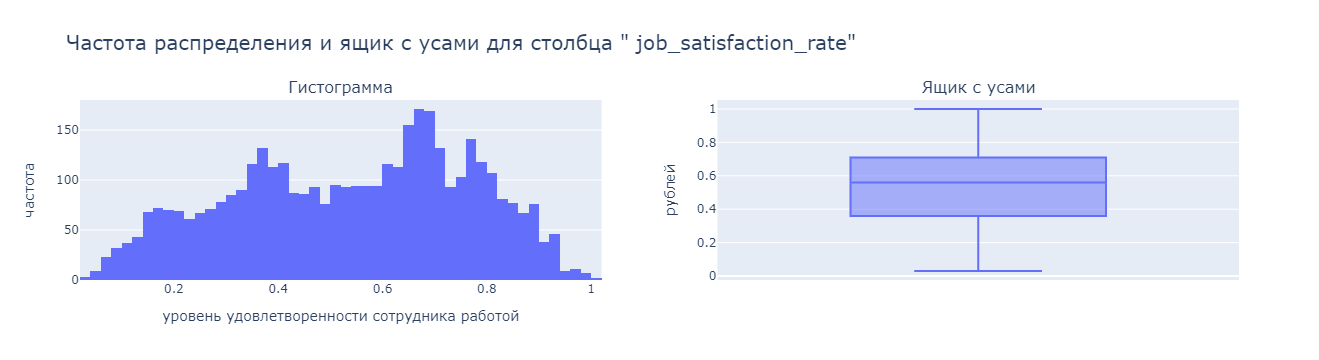

In [86]:

gist_box(data=df_train_job['job_satisfaction_rate'], gist_titl='Гистограмма',box_titl='Ящик с усами',
         gist_x='уровень удовлетворенности сотрудника работой',box_y='рублей',box_x='',
         total_titl=' Частота распределения и ящик с усами для столбца " job_satisfaction_rate"',bin=50)
         

1. Диапазон значений `salary` варьируется от 0 до 1. 
2. Медиана и среднее  равны соответственно 0.53 и 0.56.
3. Стандартное отклонение составляет 0.23.
4. Выбросов и аномалий нет.
5. Распределение визуально отличается  от нормального.

Построим диаграммы рассеяния для для целевого признака `job_satisfaction_rate` и количественных признаков, разбитых по категориям.

In [87]:
df_train_job.columns

Index(['id', 'dept', 'level', 'workload', 'employment_years',
       'last_year_promo', 'last_year_violations', 'supervisor_evaluation',
       'salary', 'job_satisfaction_rate'],
      dtype='object')

In [88]:
# Выделим категориальные признаки.
cat_tag_column =\
    ['dept','level', 'workload','last_year_promo', 'last_year_violations', 'supervisor_evaluation',]

Определим функцию **scatter_plot** для построения диаграмм рассеяния.

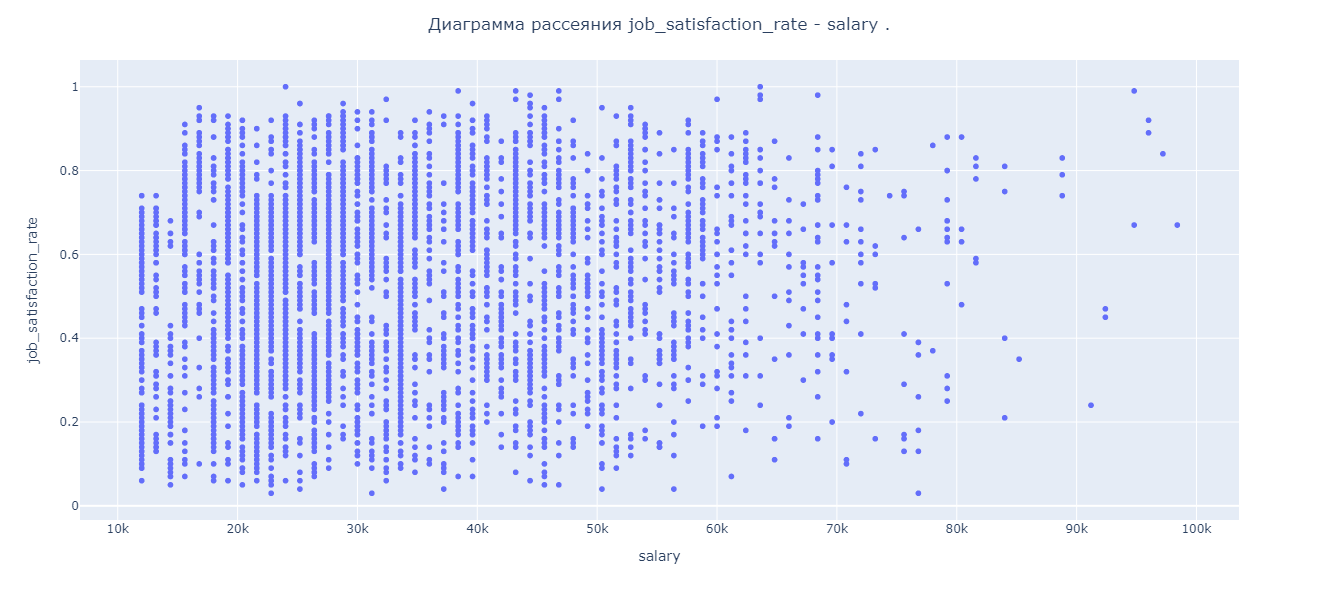

In [89]:
fig = px.scatter(df_train_job, y='job_satisfaction_rate', x='salary', width=700,
  height=600)
 
fig.update_yaxes(title_text='job_satisfaction_rate')
fig.update_xaxes(title_text='salary')
fig.update_layout(title='Диаграмма рассеяния job_satisfaction_rate - salary .', title_x=0.5)   

fig.show()


Линейная зависимость визуально не прослеживается.

Визуализируем распределение категориальных и дискретных  признаков с помощью графика барплот.

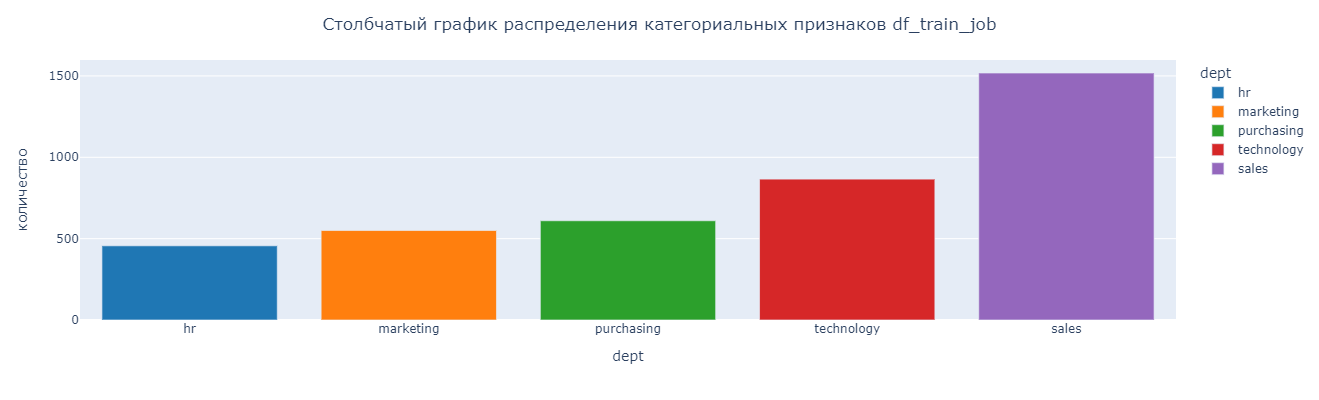

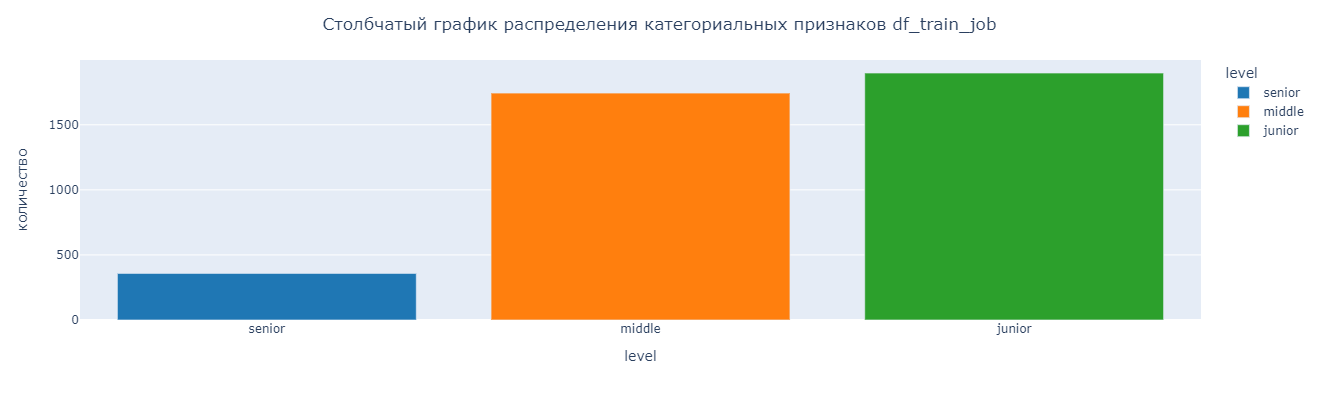

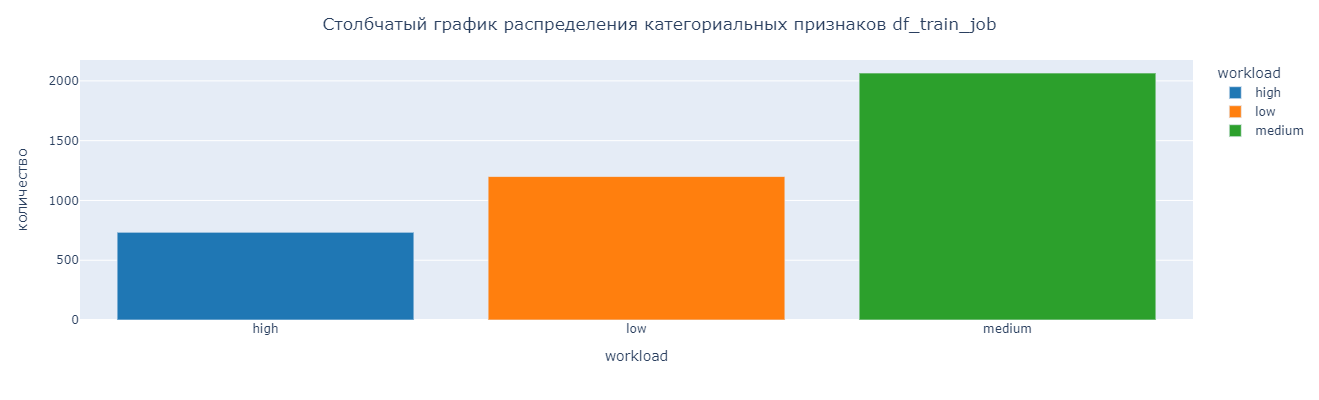

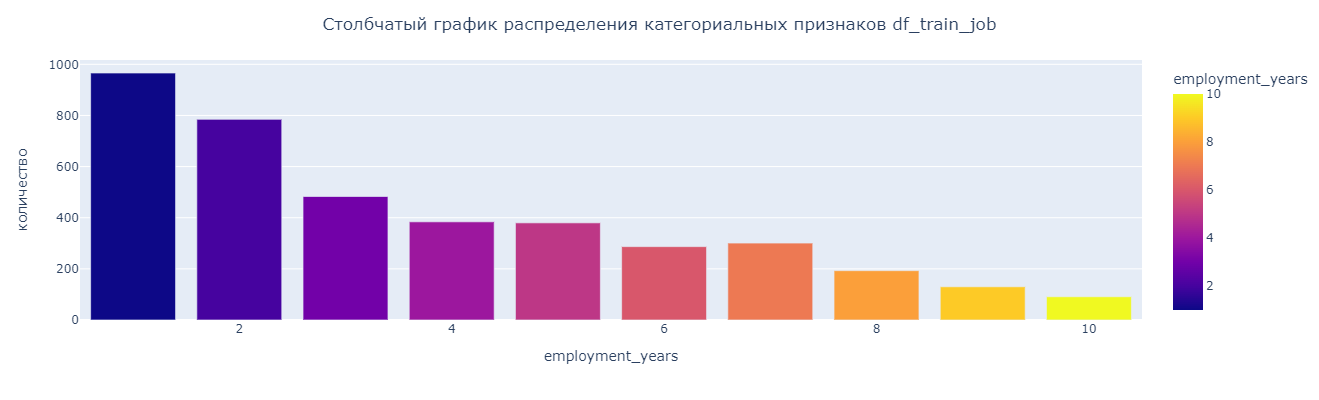

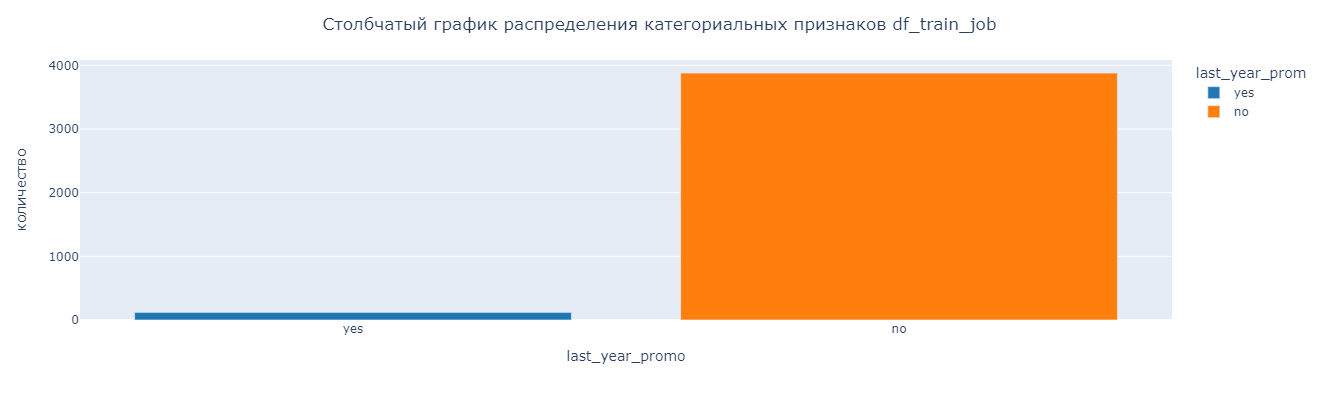

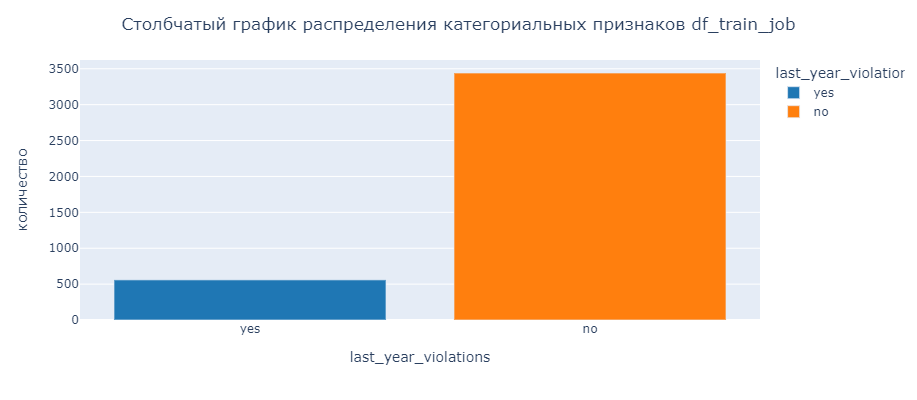

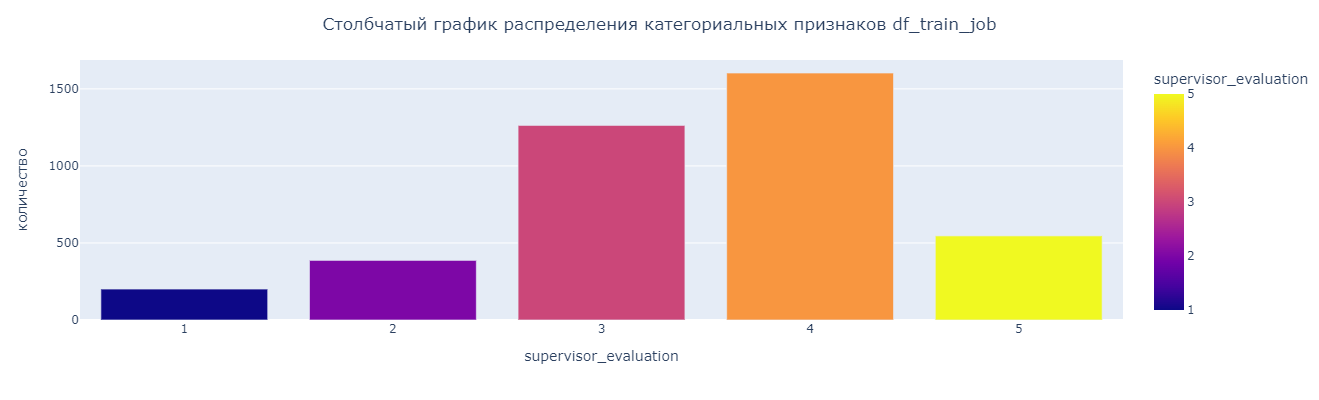

In [90]:
columns =df_train_job.drop(['id','salary','job_satisfaction_rate'],axis=1).columns.tolist()

for i, column in enumerate (columns):
    data = df_train_job.pivot_table(index=column, values='id',aggfunc='count').sort_values(by='id').reset_index()
    
    # sns.barplot(data=data, x=column, y='id', ax=axes[i//2,i%2])
    fig =px.bar(data, x=column , y='id', color=column, 
         color_discrete_sequence=px.colors.qualitative.D3,width=800, height=400)
    fig.update_layout(title='Столбчатый график распределения категориальных признаков ''df_train_job', title_x=0.5)
    fig.update_yaxes(title_text='количество')
    fig.show()

1. Столбец `dept
- наиболее частое значение в категории 'sales'-1518, наименее 'hr'-456.
  
2. Столбец 'last_year_promo'
-сильный дисбаланс классов: значение 'no' составляет 97% от общего количества наблюдений. Вероятно этот
признак будет не существенным для обучения модели.

3. Столбец 'last_year_violations'
-сильный дисбаланс классов: значение 'no' составляет 86% от общего количества наблюдений.

4. Столбец 'level'.
- наиболее часто встречающиеся значения 'junior'-1898 и 'middle'-1774, наименее 'sinior'- 358.

5. Столбец 'supervisor_evaluation'
- наиболее частая оценка - '4' - 1603 самая редкая '1' - 201.
- 
6.Столбец  'workload'
- наиболее частое значение в категории 'medium'-2066,наименее 'high'-734., знаачение 'low'встречается 1200 раз.

Отметим, что значения признаков распределены несбалансированно.

Изучим взаимосвязь между признаками в датафрейме `df_train_job`, расчитаем коэффициенты корреляции между всеми признаками. Данные включают как категориальные так и количественные признаки. В исследовательском анализе данных было выявлено, что количественные признаки не имеют нормального распределения. В таких случаях для определения корреляции между переменными наиболее подходящим выбором является использование коэффициента Фи.

In [91]:
# interval_cols=['salary','job_satisfaction_rate'] - список количественных признаков
data=df_train_job.drop('id', axis=1).phik_matrix(interval_cols=['salary','job_satisfaction_rate']).round(2)

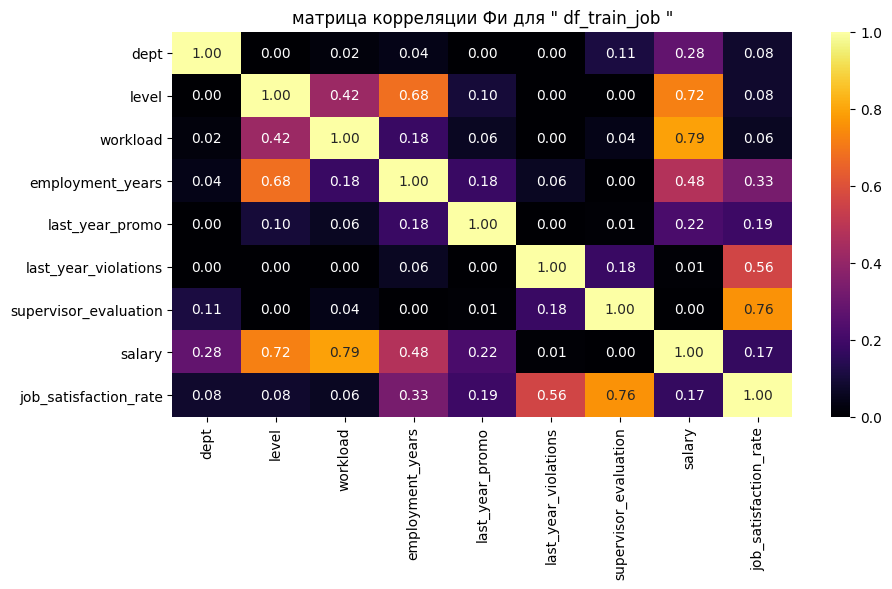

In [92]:
plt.figure(figsize=(10, 5))
sns.heatmap(data, annot=True, fmt='.2f',cmap='inferno')
plt.title('матрица корреляции Фи для " df_train_job "')
plt.show()

Мы не обнаружили мультиколлинеарности между признаками. Кроме того, наблюдается низкая корреляция между целевым признаком и 'dept', 'level' и 'workload' (менее 0.1). Следует отметить, что наиболее сильная корреляция целевого признака наблюдается с 'supervisor_evaluation' (0.76),умеренная с 'last_year_violations' (0.56) и  слабая 'employment_years' (0.33).

Расчитаем описательные статистики для числовых данных методом .describe() для `df_test_job` и `df_target`

In [93]:
df_test_job.describe()

id  employment_years  supervisor_evaluation        salary
count    2000.000000       2000.000000            2000.000000   2000.000000
mean   552765.213500          3.666500               3.526500  34066.800000
std    253851.326129          2.537222               0.996892  15398.436729
min    100298.000000          1.000000               1.000000  12000.000000
25%    339052.000000          1.000000               3.000000  22800.000000
50%    550793.000000          3.000000               4.000000  30000.000000
75%    765763.750000          6.000000               4.000000  43200.000000
max    999029.000000         10.000000               5.000000  96000.000000

In [94]:
df_target_job.describe()

id  job_satisfaction_rate
count    2000.000000             2000.00000
mean   552765.213500                0.54878
std    253851.326129                0.22011
min    100298.000000                0.03000
25%    339052.000000                0.38000
50%    550793.000000                0.58000
75%    765763.750000                0.72000
max    999029.000000                1.00000

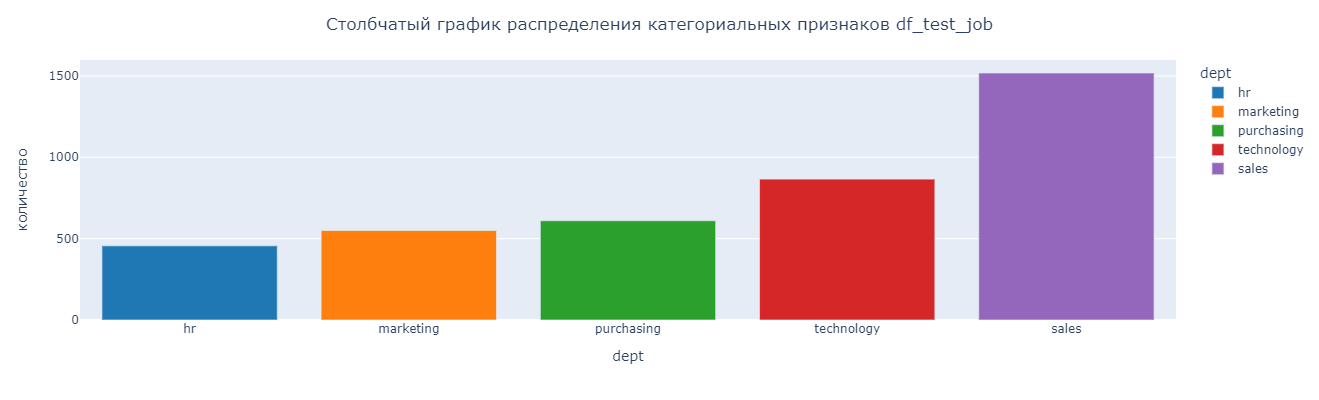

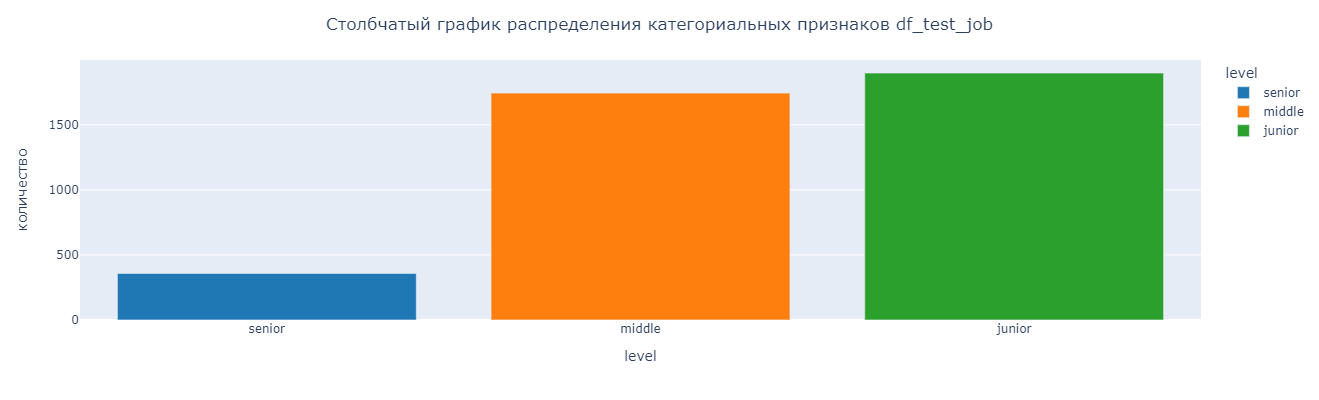

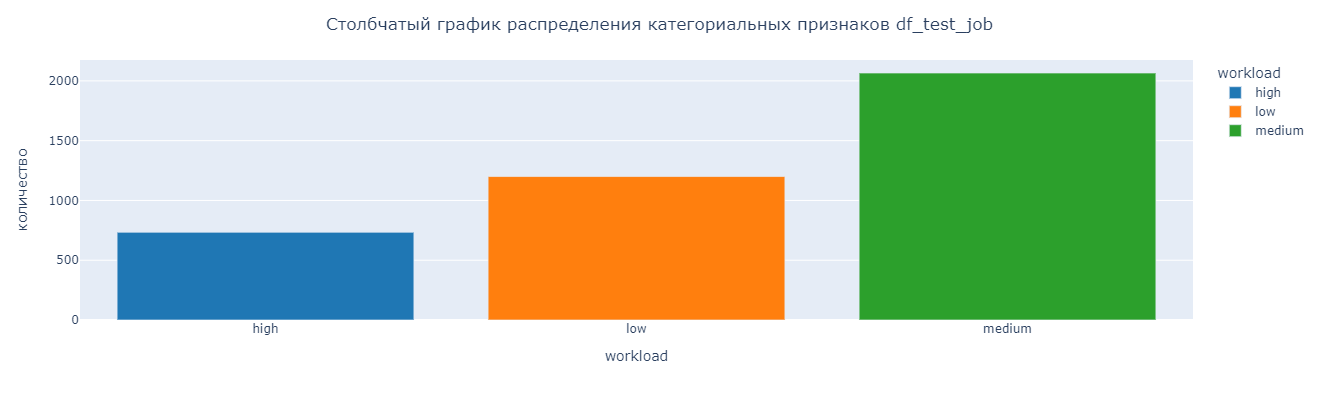

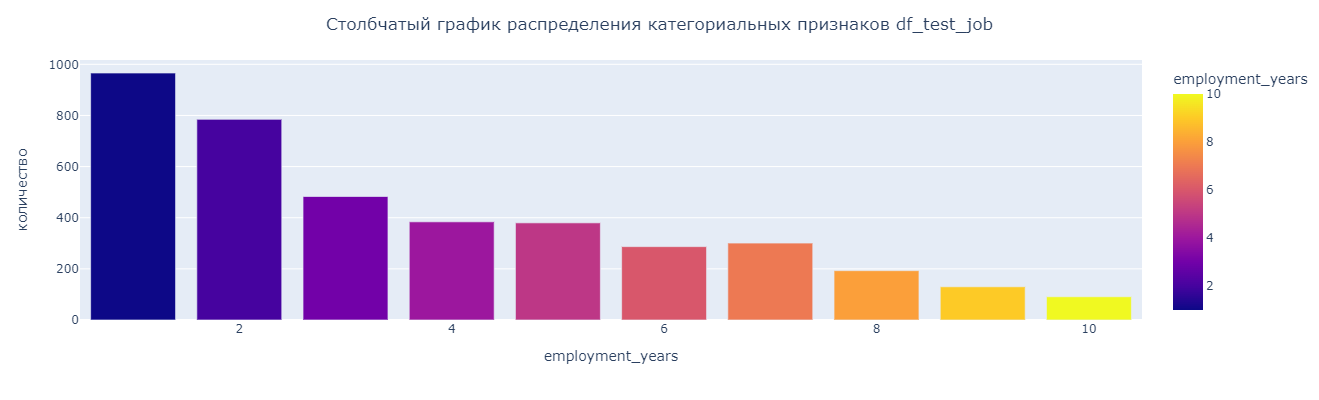

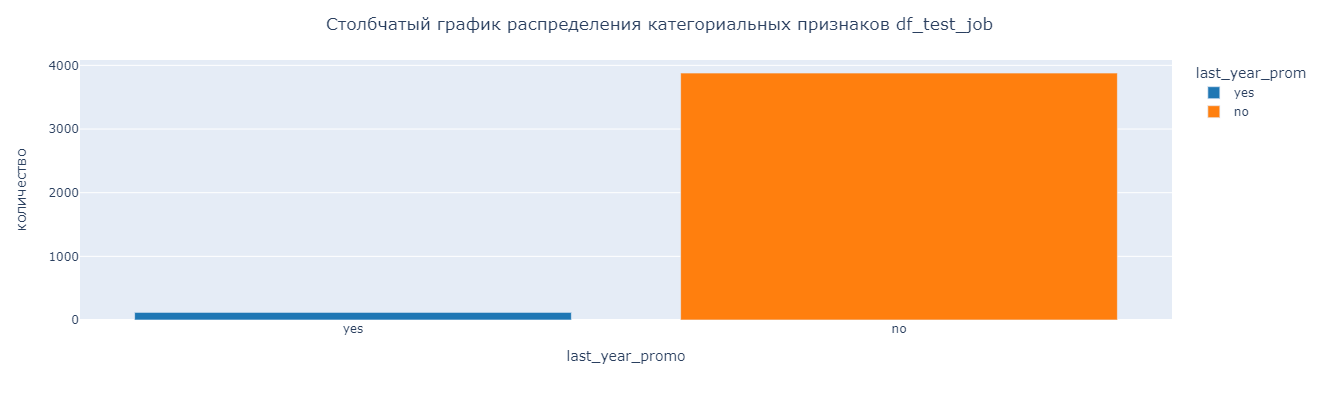

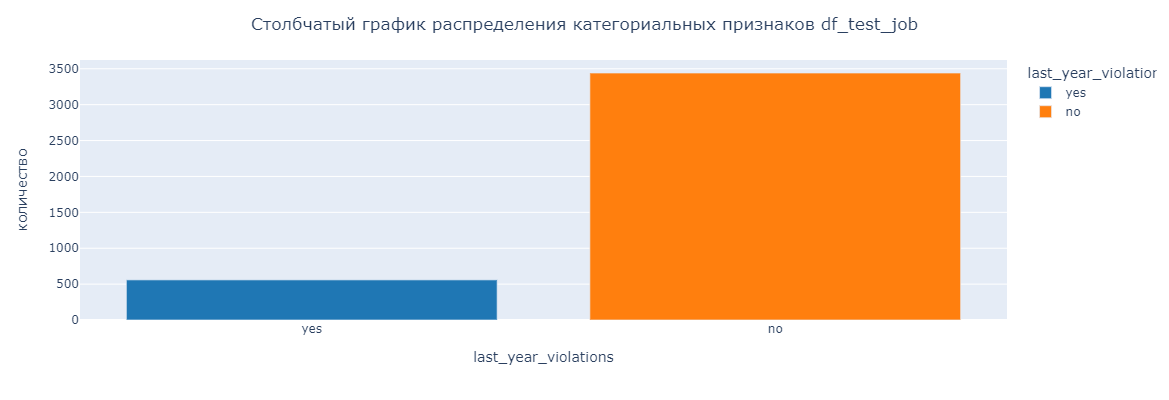

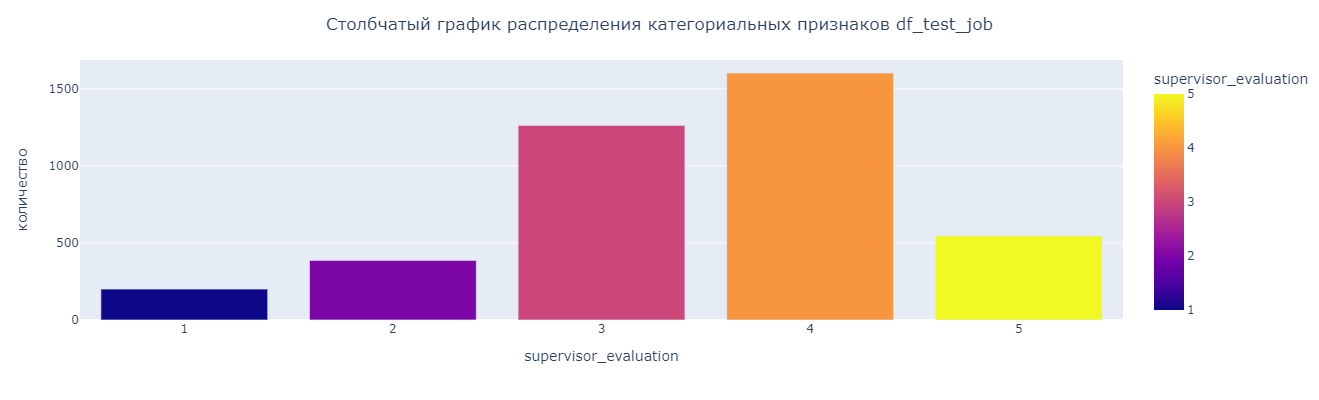

In [95]:
columns =df_test_job.drop(['id','salary',],axis=1).columns.tolist()

for i, column in enumerate (columns):
    data = df_train_job.pivot_table(index=column, values='id',aggfunc='count').sort_values(by='id').reset_index()
    
    # sns.barplot(data=data, x=column, y='id', ax=axes[i//2,i%2])
    fig =px.bar(data, x=column , y='id', color=column, 
         color_discrete_sequence=px.colors.qualitative.D3,width=800, height=400)
    fig.update_layout(title='Столбчатый график распределения категориальных признаков ''df_test_job', title_x=0.5)
    fig.update_yaxes(title_text='количество')
    fig.show()

Характер распределения категориальных признаков в тестовых данных  схож  с данными в тренировочной выборке. 
Анамольных значений и выбрасов  в количественных  признаках не выявлено.

Общие выводы:

В предоставленных данных отстутствуют аномалии и выбросы за исключением признака 'salary'. Наличие выборосов в 'salary' укладываются  в  логику признака и обработки не требуют.
Линейная зависимость визуально на графиках scatterplot не прослеживается.
Mежду признаками  мультиколлинеарность не обнаружена .Наблюдается низкая корреляция между целевым признаком и 'dept', 'level' и 'workload' (менее 0.1). Следует отметить, что наиболее сильная корреляция целевого признака наблюдается с 'supervisor_evaluation' (0.76), умереная 'last_year_violations' (0.56) и  и слабая 'employment_years' (0.33

Отметим, что значения признаков распределены несбалансированно.

Изучим взаимосвязь между признаками в датафрейме `df_test_job`, расчитаем коэффициенты корреляции между всеми признаками. Данные включают как категориальные так и количественные признаки. В таких случаях для определения корреляции между переменными наиболее подходящим выбором является использование коэффициента Фи.

In [181]:
# interval_cols=['salary'] - список количественных признаков
data=df_test_job.drop('id', axis=1).phik_matrix(interval_cols=['salary']).round(2)

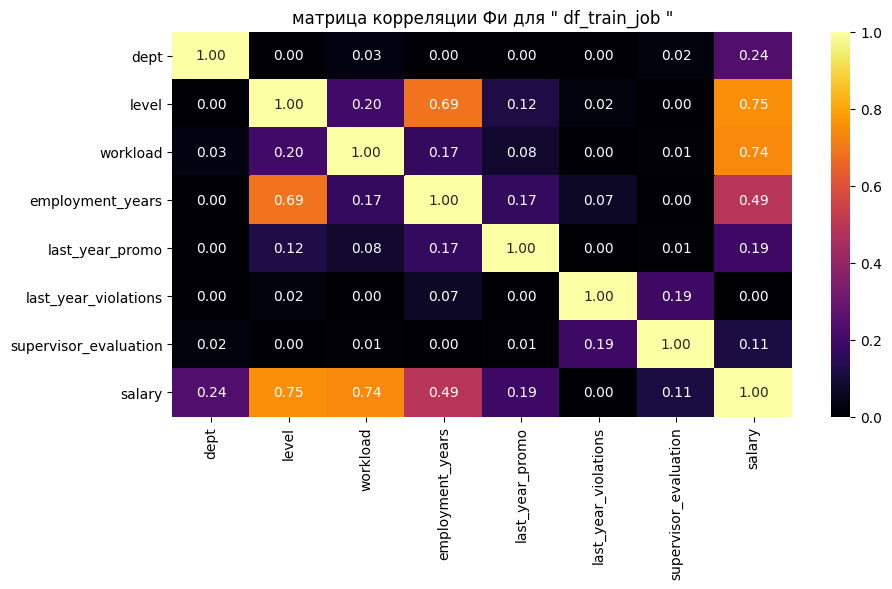

In [97]:
plt.figure(figsize=(10, 5))
sns.heatmap(data, annot=True, fmt='.2f',cmap='inferno')
plt.title('матрица корреляции Фи для " df_train_job "')
plt.show()

Мультиколлинеарность между признаками не обнаружена.

**строим матрицу корреляции**

In [ ]:
from phik.report import plot_correlation_matrix

plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
)

In [183]:
# Импортируем функцию для отрисовки графика plot_correlation_matrix
from phik.report import plot_correlation_matrix

# расчитываем  значение матрицф корреляции методом p
matrix_phik =df_test_job.drop('id', axis=1).phik_matrix(interval_cols=['salary']).round(2)


In [184]:
data

dept  level  workload  employment_years  \
dept                   1.00   0.00      0.03              0.00   
level                  0.00   1.00      0.20              0.69   
workload               0.03   0.20      1.00              0.17   
employment_years       0.00   0.69      0.17              1.00   
last_year_promo        0.00   0.12      0.08              0.17   
last_year_violations   0.00   0.02      0.00              0.07   
supervisor_evaluation  0.02   0.00      0.01              0.00   
salary                 0.24   0.75      0.74              0.49   

                       last_year_promo  last_year_violations  \
dept                              0.00                  0.00   
level                             0.12                  0.02   
workload                          0.08                  0.00   
employment_years                  0.17                  0.07   
last_year_promo                   1.00                  0.00   
last_year_violations              0.00                  1.00   
supervisor_evaluation             0.01                  0.19   
salary                            0.19                  0.00   

                       supervisor_evaluation  salary  
dept                                    0.02    0.24  
level                                   0.00    0.75  
workload                                0.01    0.74  
employment_years                        0.00    0.49  
last_year_promo                         0.01    0.19  
last_year_violations                    0.19    0.00  
supervisor_evaluation                   1.00    0.11  
salary                                  0.11    1.00

1. Функции передаём значения матрицы корреляции phik_overview.values.
2. Указываем наименования столбцов x_labels=phik_overview.columns.
3. Указываем наименования строк y_labels=phik_overview.index.
4. Указываем цвет градиентной отрисовки vmin=0, vmax=1, color_map='Greens'.
5. Добавляем заголовок title=r'correlation $\phi_K$'.
6. Увеличиваем размер шрифта fontsize_factor=1.5.
7. Увеличиваем размер графика figsize=(20, 15).

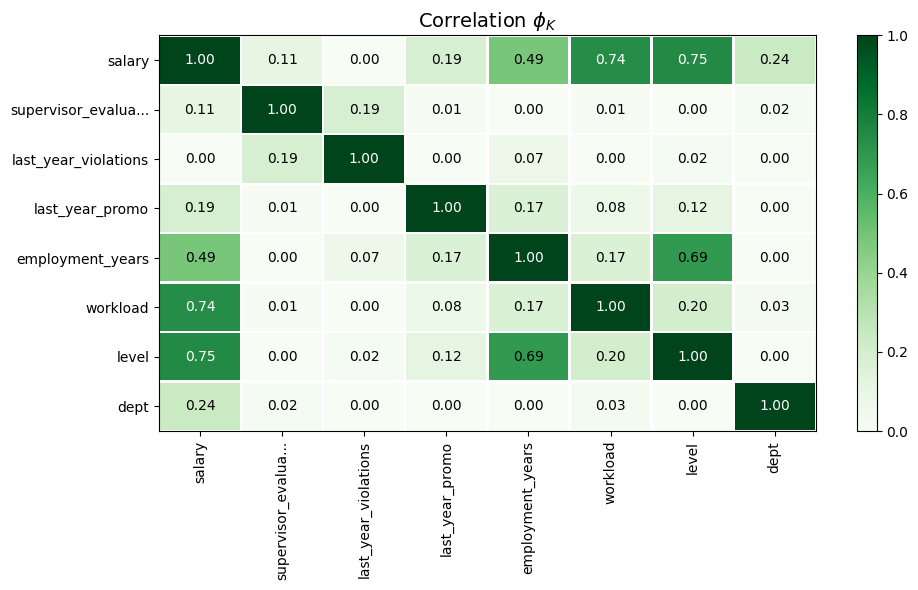

In [209]:
plot_correlation_matrix(
    matrix_phik.values,
    x_labels=matrix_phik.columns,
    y_labels=matrix_phik.index,
    vmin=0, vmax=1, color_map='Greens',
    # r'Correlation $\phi_K$'  Это часть строки, содержащая LaTeX-команду для отображения символа Фи с индексом K.
    # r raw _ обратный слэш просто как символ обратного слэша.
    title=r'Correlation $\phi_K$',
    fontsize_factor=1,
    figsize=(10, 6)
)

### <center> Подготовка данных и обучение моделей. </center>

In [98]:
df_train_job.head()

id        dept   level workload  employment_years last_year_promo  \
0  155278       sales  junior   medium                 2              no   
1  653870          hr  junior     high                 2              no   
2  184592       sales  junior      low                 1              no   
3  171431  technology  junior      low                 4              no   
4  693419          hr  junior   medium                 1              no   

  last_year_violations  supervisor_evaluation  salary  job_satisfaction_rate  
0                   no                      1   24000                   0.58  
1                   no                      5   38400                   0.76  
2                   no                      2   12000                   0.11  
3                   no                      2   18000                   0.37  
4                   no                      3   22800                   0.20

Подготовим признаки для обучения модели:
1. Отмасштабируем количественные признаки:`employment_years` и `salary` 
2. Ранговые категориальные признаки `level`,`workload`, `supervisor_evaluation`закодируем с помощью OrdinalEncoder. Встречающияся значения пустой строки ' ' в  столбцах `dept`и `workload` заменим
на np.nan.
3. `dept`, `last_year_promo	`,`last_year_violations` закодируем c помощью OneHotEncoder.
4. Заполним появившиеся пропуски c помощью SimplImputer.

Для тренировоченой выборки:
cохраним целевой признак в переменную **y_train**, входные признаки в переменную **X_train**.

Для тестовых данных:
cохраним целевой признак в переменную **y_test**, входные признаки в переменную **X_test**.
Столбец`id` исключим из списка признаков.

Сформируем списки признаков для кодировщиков и скейлеров:
- columns_num - список признаков для масштабирования;
- columns_ohe - список признаков для кодирования OneHotEncoder;
- columns_ord - список признаков для кодирования OrdinalEncoder.
- categories - список ранговых значений для OrdinalEncoder.

In [99]:
df_train_dub =  df_train_job.drop('id',axis=1).drop_duplicates()
print(f'Количество явных неполных дубликатов,без "id": { df_train_dub.duplicated().sum()}')

Количество явных неполных дубликатов,без "id": 0


In [100]:
X_train = df_train_dub.drop('job_satisfaction_rate',axis=1)
y_train = df_train_dub['job_satisfaction_rate']


X_test= df_test_job.sort_values(by='id').drop('id',axis=1)
y_test = df_target_job.sort_values(by='id').drop('id',axis=1)

In [101]:
columns_num = X_train.select_dtypes(include='number').columns.tolist()
columns_cat = X_train.select_dtypes(exclude='number').columns.tolist()

In [102]:
print(columns_cat)
columns_num

['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations']


['employment_years', 'supervisor_evaluation', 'salary']

In [103]:
columns_ohe = ['dept', 'last_year_promo', 'last_year_violations']
columns_ord = ['level', 'workload']

In [104]:
columns_num.pop(1)
columns_num

['employment_years', 'salary']

In [105]:
categories = [  [i for i  in sorted(X_train[t].unique().tolist()) ] for t in columns_ord]
categories

[['junior', 'middle', 'senior'], ['high', 'low', 'medium']]

In [106]:
categories[1].append('high')
categories[1].pop(0)

'high'

Проверим список упорядоченных значений для OrdinalEncoder и списки столбцов.

In [107]:
print(f'categories: { categories}')
print(f'columns_num :{columns_num}')
print(f'columns_ohe :{columns_ohe}')
print(f'columns_ord :{columns_ord}')

categories: [['junior', 'middle', 'senior'], ['low', 'medium', 'high']]
columns_num :['employment_years', 'salary']
columns_ohe :['dept', 'last_year_promo', 'last_year_violations']
columns_ord :['level', 'workload']


Построим  пайплайны для кодирования и масштабирования данных, объединим этапы подготовки данных в 
пайплайн **data_preprocessor**.

In [108]:
# Пайплайн для OneHotEncoder
ohe_pipe = Pipeline(
    [
        (
           'ohe_pipe', 
        OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
         )
     ]    
)
# Пайплайн для OrdinalEncoder + one-pipe_imputer для заполнения возможных пропусков после кодирования.
ord_pipe = Pipeline(
    [
        (
            'ord_pipe',
             OrdinalEncoder(handle_unknown='use_encoded_value',
             unknown_value=np.nan, categories=categories)
        ),
        (    
            'imputer',one_pipe_imputer
        )
    ]
)

# Пайплайн для  cкейлера StandardScaler
num_pipe = Pipeline(
    [
        (
        'num', StandardScaler()
        )
    ]
)    
                           




In [109]:
# Создадим пайплайн подготовки данных, используя ColumnTransformer


data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, columns_ohe),
        ('ord', ord_pipe, columns_ord),
        ('num', num_pipe, columns_num)
    ],
    remainder='passthrough'
)



data_preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe',
                                 Pipeline(steps=[('ohe_pipe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['dept', 'last_year_promo',
                                  'last_year_violations']),
                                ('ord',
                                 Pipeline(steps=[('ord_pipe',
                                                  OrdinalEncoder(categories=[['junior',
                                                                              'middle',
                                                                              'senior'],
                                                                             ['low',
                                                                              'medium',
                                                                              'high']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=nan)),
                                                 ('imputer',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]))]),
                                 ['level', 'workload']),
                                ('num',
                                 Pipeline(steps=[('num', StandardScaler())]),
                                 ['employment_years', 'salary'])])

Создадим итоговый пайплайн включающий следующие шаги:
1. one_pipe_imputer -пайплайн для обработки пропусков
2. data_preprocessor - масштабирующий признаки, кодирующий c помощью OneHotEncoder, кодирующий с помощью OrdinalEncoder и заполняющий возможные пропуски.
3. model  - модель для предсказания.

Для предсказания выберем две линеные модели:
1. ElasticNet модель линейной регрессии  свозможностью l1 и L2 регуляризации.
- alpha  от 0.1 до 1 с шагом 0.1  от 1 до 100  с шагом 1
- l1_ratio 10 значений  от 1 до 10
3. DecisionTreeRegressor
- max_depth: от 2 до 10
- min_samples_split: от 2 до 10
- min_samples_leaf: от 1 до 5

In [110]:
pipe_final = Pipeline(
    [
       
        ('preprocessor', data_preprocessor),
        ('model', ElasticNet(alpha=1.0,l1_ratio=0.5,random_state=RANDOM_STATE,))
    ]
)    

In [111]:
pipe_final

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('ohe_pipe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(steps=[('ord_pipe',
                                                                   OrdinalEncoder(categories=[['junior',
                                                                                               'middle',
                                                                                               'senior'],
                                                                                              ['low',
                                                                                               'medium',
                                                                                               'high']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan)),
                                                                  ('imputer',
                                                                   Pipeline(steps=[('simple_imputer',
                                                                                    SimpleImputer(strategy='most_frequent'))]))]),
                                                  ['level', 'workload']),
                                                 ('num',
                                                  Pipeline(steps=[('num',
                                                                   StandardScaler())]),
                                                  ['employment_years',
                                                   'salary'])])),
                ('model', ElasticNet(random_state=50))])

In [112]:
pipe_final_learn = pipe_final.fit(X_train,y_train)

Создадим скорер **SMAPE** для проверки качества  модели.
Формула для вычисления :   (100/n)S( |y_test -y_pred|/((|y_test|+|y_pred|)/2)) )

In [113]:
def smape_score(y_true, y_pred):
    y = np.array( y_true).squeeze()
    smape = np.sum( np.abs(y - y_pred)*2/(np.abs(y)+ np.abs(y_pred)))* (100/len(y))
    return smape                                                                         

In [114]:
smape_scorer = make_scorer(smape_score, greater_is_better=False)

In [115]:
# Временно отключаем все предупреждения
warnings.filterwarnings("ignore")
# Включаем предупреждения обратно
# warnings.filterwarnings("default")

 
Для выполнения кросс-валидации и подбора оптимальных гиперпараметров модели был использован метод **GridSearchCV** с параметром cv=5. 

 Создадим словарь с параметрами для каждой модели для работы в GridSearchCV.

 ElasticNet и гиперпараметры:.
- 'model__l1_ratio'.
- 'model__alpha'.

 DecisionTreeRegressor и гиперпараметры:
- max_depth.
- model__min_samples_split.
- model__min_samples_leaf.

In [116]:
array_1 = np.arange(0.1, 1.1, 0.1)  # от 0.1 до 1 с шагом 0.1
array_2 = np.arange(1, 101, 1) # от 1 до 100 с шагом 1
# Объединяем две последовательности
array_result = np.concatenate((array_1, array_2))


param_model= [
        # словарь для модели ElasticNet
       {
        'model': [ ElasticNet(random_state=RANDOM_STATE)],
        'model__l1_ratio' : np.linspace(0, 1, 10),
        'model__alpha':array_result,
        },

     
        # словарь для модели DecisionTreeRegressor
        
        {
      'model':[DecisionTreeRegressor(random_state=RANDOM_STATE)],
          'model__max_depth': range(5,20),  
          'model__min_samples_split': range(2,11),
          'model__min_samples_leaf' : range(1,6)
         } 
]


In [117]:
grid_search = GridSearchCV(
    pipe_final, 
    param_model, 
    cv=9,
    scoring = smape_scorer,
    n_jobs=-1
)

In [118]:
start_time = time.time()

grid_search.fit(X_train,y_train)

end_time = time.time()

In [119]:
print(f'Время работы GridSearchCV: {round((end_time - start_time),0)} секунд')

Время работы GridSearchCV: 338.0 секунд


In [120]:
print ('Метрика SMAPE лучшей модели  полученная с помощью кросс-валидации:', abs( grid_search.best_score_))
print('Параметры лучшей модели:')
grid_search.best_params_

Метрика SMAPE лучшей модели  полученная с помощью кросс-валидации: 14.78762722417194
Параметры лучшей модели:


{'model': DecisionTreeRegressor(random_state=50),
 'model__max_depth': 17,
 'model__min_samples_leaf': 3,
 'model__min_samples_split': 2}

In [121]:
y_test_pred = grid_search.predict(X_test)
print(f'Метрика SMAPE на тестовой выборке: {smape_score(y_test, y_test_pred):.4f}')

Метрика SMAPE на тестовой выборке: 13.5263


In [122]:
# Подготовим данные  в шаге `preprocessor`.
X_test_prepare = grid_search.best_estimator_.named_steps['preprocessor'].transform(X_test)
X_train_prepare = grid_search.best_estimator_.named_steps['preprocessor'].transform(X_train)
dummy_regr = DummyRegressor()
model_dummy = dummy_regr.fit(X_train_prepare, y_train)
y_pred_dummy= model_dummy.predict(X_test)
print(f'Метрика SMAPE на тестовой выборке: {smape_score(y_test, y_pred_dummy):.4f}')

Метрика SMAPE на тестовой выборке: 38.2628


Результаты оценки адекватности модели с помощью DummyRegressor показали, что значение метрики SMAPE на тестовой выборке составило 0.5000. В то же время, метрика SMAPE на тестовой выборке для реальной модели составила 0.9193. Это свидетельствует о высокой предсказательной способности нашей модели по сравнению с предсказанием среднего значения.

Создадим список   с результатами работы GridSearchCV 

In [123]:
result= pd.DataFrame(grid_search.cv_results_).sort_values(by='rank_test_score')\
                       [['mean_fit_time','params','mean_test_score','std_test_score','rank_test_score']]

In [124]:
result.head(3)

mean_fit_time  \
1662       0.057267   
1661       0.053599   
1660       0.051932   

                                                                                                                                      params  \
1662  {'model': DecisionTreeRegressor(random_state=50), 'model__max_depth': 17, 'model__min_samples_leaf': 3, 'model__min_samples_split': 6}   
1661  {'model': DecisionTreeRegressor(random_state=50), 'model__max_depth': 17, 'model__min_samples_leaf': 3, 'model__min_samples_split': 5}   
1660  {'model': DecisionTreeRegressor(random_state=50), 'model__max_depth': 17, 'model__min_samples_leaf': 3, 'model__min_samples_split': 4}   

      mean_test_score  std_test_score  rank_test_score  
1662       -14.787627        0.668669                1  
1661       -14.787627        0.668669                1  
1660       -14.787627        0.668669                1

 ElasticNet.

In [125]:
elasticnet = result[result['params'].astype(str).str.contains('ElasticNet')].sort_values(by='rank_test_score')

elasticnet.head(1)

mean_fit_time  \
0       0.147077   

                                                                                params  \
0  {'model': ElasticNet(random_state=50), 'model__alpha': 0.1, 'model__l1_ratio': 0.0}   

   mean_test_score  std_test_score  rank_test_score  
0       -26.412274        1.323621              676

 Изучим распределение наиболее важных признаков обученной модели:

In [126]:
feature_model = grid_search.best_estimator_.named_steps['model'].feature_importances_
columns_model = grid_search.best_estimator_.named_steps['preprocessor'].get_feature_names_out()

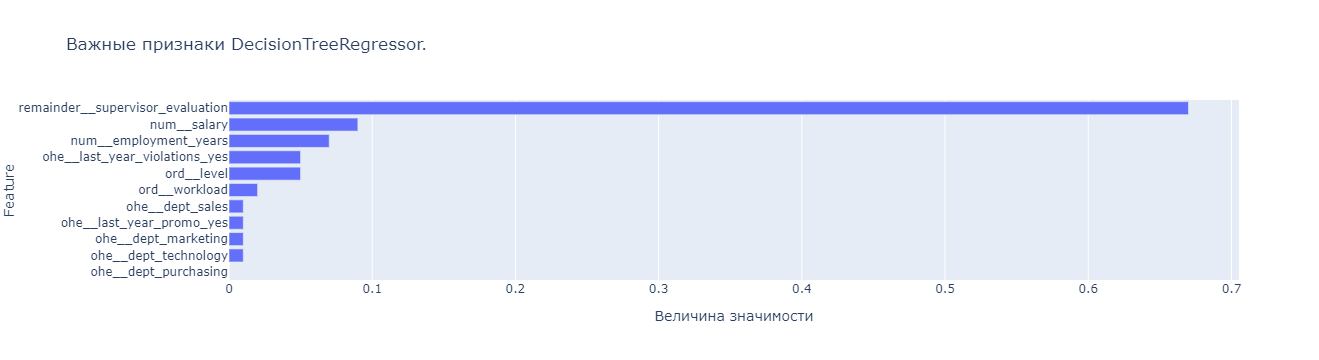

In [127]:
feature_importances = pd.DataFrame(
    {'Feature': columns_model,
     'Importance': feature_model
    })

fig = px.bar(feature_importances.sort_values(by='Importance',ascending=True).round(2),
             x='Importance', y='Feature', orientation='h', title='Важные признаки DecisionTreeRegressor.')
fig.update_layout(xaxis_title='Величина значимости')
fig.show()

Выводы:

Для решения задачи регрессии  лучшей оказалась модель  DecisionTreeRegressor с параметрами:

- max_depth=17,
- min_samples_leaf=3,
- min_samples_split=2
- 
Значение метрика SMAPE на тестовой выборке: 13.5263 при обозначенном целевом значениии <=15.

Лучшая регрессионная линейная модель  ElasticNet на тестовой выборке показала значение SMAPE=24,75",
что значительно хуже.

 Исследование не выявило четкой линейной зависимости между признаками и целевой переменной. Это может быть 
одной из причин слабой эффективности модели ElasticNet, которая предполагает линейную зависимость. В отличие от нее, DecisionTreeRegressor не требует линейности и могут лучше справляться с нелинейными зависимостями.

Пять наиболее важных признаков
- 'supervisor_evaluation' - 0.67.
- 'salary' - 0.09
- 'employment_years' 0.07
- 'last_year_violations' -0.05
- 'level' - 0.05


## <center> 2. Предсказание увольнения сотрудника из компании. </center>

### <center> 1. Загрузка данных. </center>

1. Загрузим дополнительные данные :
- `train_quit.csv` -тренировачная выборка;
- `test_target_job_quit.csv` - целевой признак тестовой выборки.
2. Ознокомимся с ними.
  
Данные тестовой выборки такие же, как и в предыдущей задаче, поэтому мы воспользуемся предварительно обработанной таблицей `df_test_job`.


In [128]:
try:
    df_train_quit = pd.read_csv('/datasets/train_quit.csv')
    df_target_quit = pd.read_csv('/datasets/test_target_quit.csv')
except:
    df_train_quit = pd.read_csv('train_quit.csv')
    df_target_quit = pd.read_csv('test_target_quit.csv')

In [129]:
df_train_quit.head()

id        dept   level workload  employment_years last_year_promo  \
0  723290       sales  middle     high                 2              no   
1  814010       sales  junior   medium                 2              no   
2  155091  purchasing  middle   medium                 5              no   
3  257132       sales  junior   medium                 2              no   
4  910140   marketing  junior   medium                 2              no   

  last_year_violations  supervisor_evaluation  salary quit  
0                   no                      4   54000   no  
1                   no                      4   27600   no  
2                   no                      1   37200   no  
3                  yes                      3   24000  yes  
4                   no                      5   25200   no

In [130]:
df_target_quit.head()

id quit
0  999029  yes
1  372846   no
2  726767   no
3  490105   no
4  416898  yes

### <center> 2. Предобработка данных. </center>

In [131]:
df_train_quit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


Исправим слово sinior на senior в столбце `level`.

In [132]:
df_train_quit['level'] = df_train_quit['level'].where (df_train_quit['level'] !='sinior','senior')
df_train_quit['level'].unique()

array(['middle', 'junior', 'senior'], dtype=object)

В  `df_train_quit` пропуски не обнаружены.

Проверим датафрейм на наличие явных дубликатов, полных и неполных и категориальные данные на неявные дубликаты.

In [133]:
print(f'Количество явных дубликатов: { df_train_quit.duplicated().sum()}')
print(f'Количество явных неполных  дубликатов: { df_train_quit.drop("id",axis=1).duplicated().sum()}')
for col in df_train_quit.select_dtypes(include='object').columns:
    print(f'Список уникальных значений в столбце {col} : {df_train_quit[col].unique()}')
 

Количество явных дубликатов: 0
Количество явных неполных  дубликатов: 1413
Список уникальных значений в столбце dept : ['sales' 'purchasing' 'marketing' 'technology' 'hr']
Список уникальных значений в столбце level : ['middle' 'junior' 'senior']
Список уникальных значений в столбце workload : ['high' 'medium' 'low']
Список уникальных значений в столбце last_year_promo : ['no' 'yes']
Список уникальных значений в столбце last_year_violations : ['no' 'yes']
Список уникальных значений в столбце quit : ['no' 'yes']


Обнаружены неполные дубликаты в данных (без 'id'). Прежде чем передать данные в модель, мы удалим эти дубликаты на этапе подготовки.
Полные явные  и неявные дубликаты необнаружены.

Датафрейм `df_train_quit` подготовлен к исследовтельскому анализу.

Проверим наличие пропусков и неявных дубликатов в 'df_target_quit'.

In [134]:
df_target_quit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [135]:
df_target_quit['quit'].unique()

array(['yes', 'no'], dtype=object)

Пропуски и неявные дубликаты в `df_target_quit``не обнаружены.

### <center> 3. Исследовательский анализ данных. </center>

Исследовательский анализ датафрема `df_train_quit`

In [136]:
df_train_quit.head()

id        dept   level workload  employment_years last_year_promo  \
0  723290       sales  middle     high                 2              no   
1  814010       sales  junior   medium                 2              no   
2  155091  purchasing  middle   medium                 5              no   
3  257132       sales  junior   medium                 2              no   
4  910140   marketing  junior   medium                 2              no   

  last_year_violations  supervisor_evaluation  salary quit  
0                   no                      4   54000   no  
1                   no                      4   27600   no  
2                   no                      1   37200   no  
3                  yes                      3   24000  yes  
4                   no                      5   25200   no

Расчитаем описательные статистики для числовых данных  методом .describe(), построим для каждого признака гистограмму  и боксплот.  
Признак `supervisor_evaluation`, оценивающий качество работы сотрудника, является категориальным признаком.

In [137]:
df_train_quit.drop('id',axis=1).describe().round(2)

employment_years  supervisor_evaluation    salary
count           4000.00                4000.00   4000.00
mean               3.70                   3.47  33805.80
std                2.54                   1.00  15152.42
min                1.00                   1.00  12000.00
25%                2.00                   3.00  22800.00
50%                3.00                   4.00  30000.00
75%                6.00                   4.00  43200.00
max               10.00                   5.00  96000.00

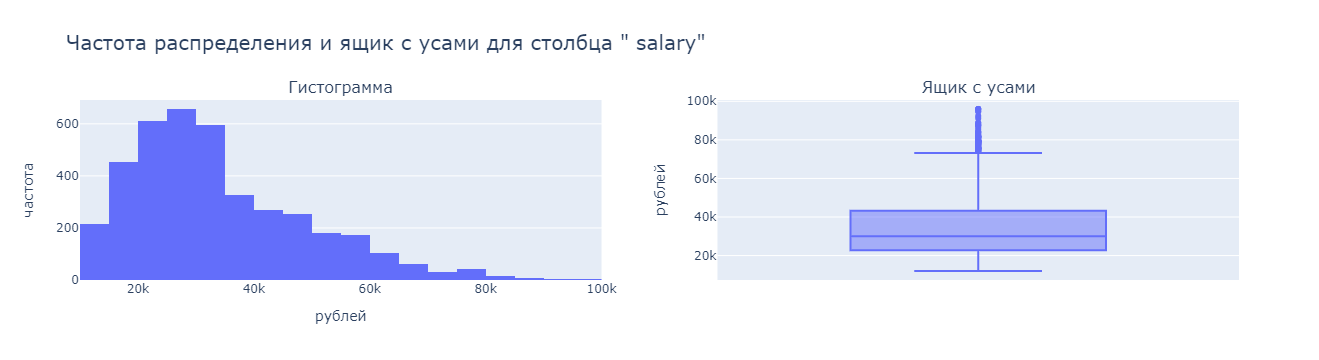

In [138]:

gist_box(data=df_train_quit['salary'], gist_titl='Гистограмма',box_titl='Ящик с усами',
         gist_x='рублей',box_y='рублей',box_x='',
         total_titl=' Частота распределения и ящик с усами для столбца " salary"',bin=30)
         

1. Диапазон значений `salary` варьируется от 12000 до 96000. 
2. Медиана и среднее  равны соответственно 30000, 33805.
3. Стандартное отклонение составляет 15152.
4. На боксплоте можно наблюдать  выбросы вверх со значения 74400. Значения выборосов укладываются в логику
 признака и обработки не требуют.


Визуализируем распределение категориальных и дискретных признаков с помощью графика барплот.

In [139]:
df_train_quit.head()

id        dept   level workload  employment_years last_year_promo  \
0  723290       sales  middle     high                 2              no   
1  814010       sales  junior   medium                 2              no   
2  155091  purchasing  middle   medium                 5              no   
3  257132       sales  junior   medium                 2              no   
4  910140   marketing  junior   medium                 2              no   

  last_year_violations  supervisor_evaluation  salary quit  
0                   no                      4   54000   no  
1                   no                      4   27600   no  
2                   no                      1   37200   no  
3                  yes                      3   24000  yes  
4                   no                      5   25200   no

In [140]:
# Выделим категориальные признаки.
cat_tag_column =\
    ['dept','level', 'workload','employment_years','last_year_promo', 'last_year_violations', 'supervisor_evaluation','quit']


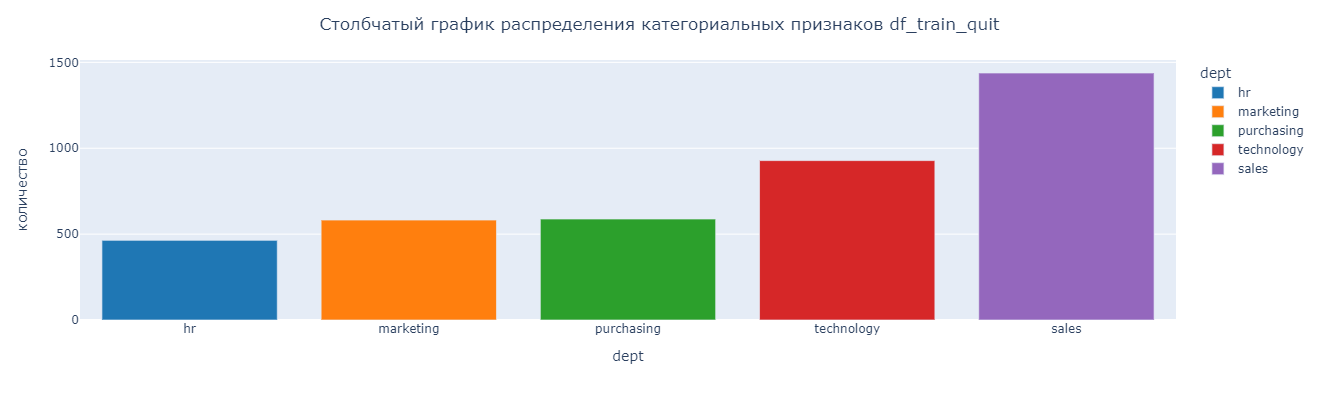

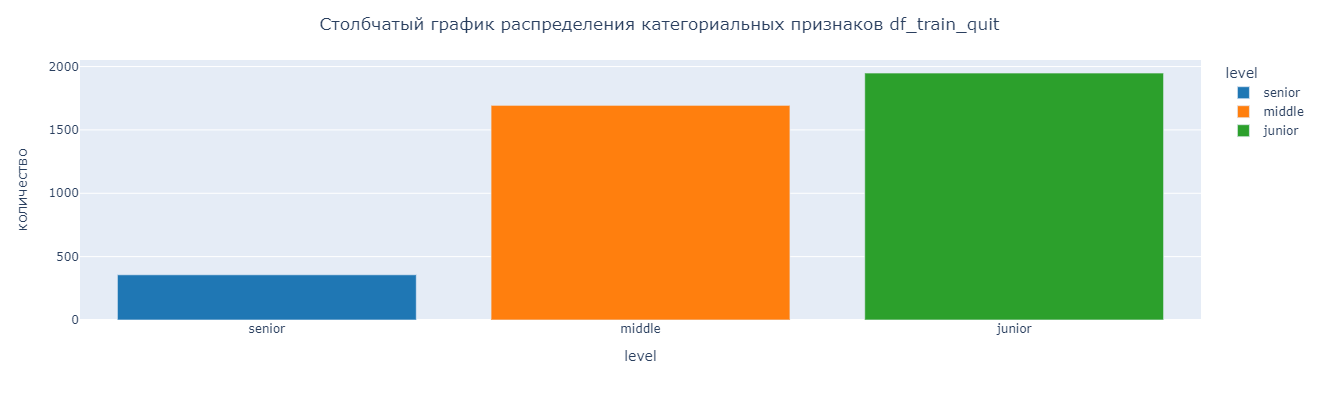

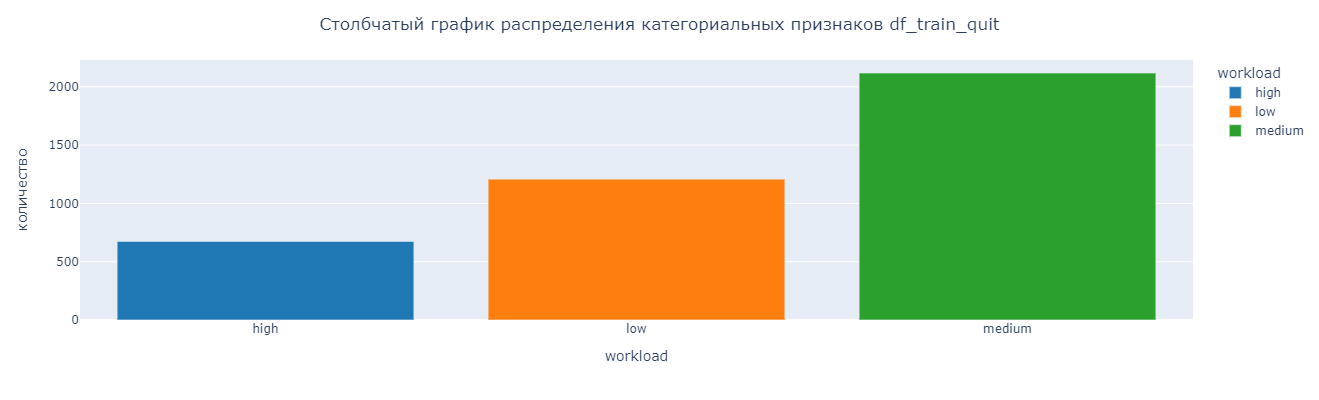

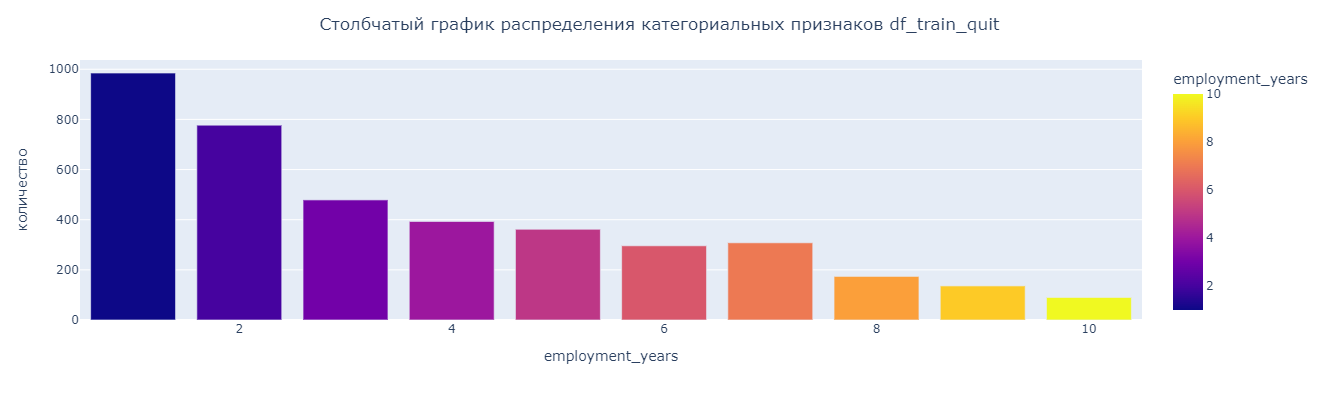

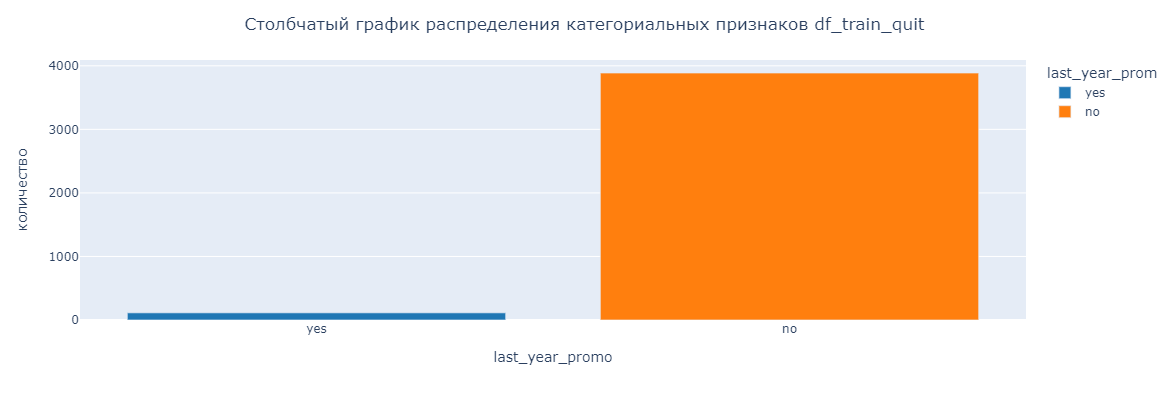

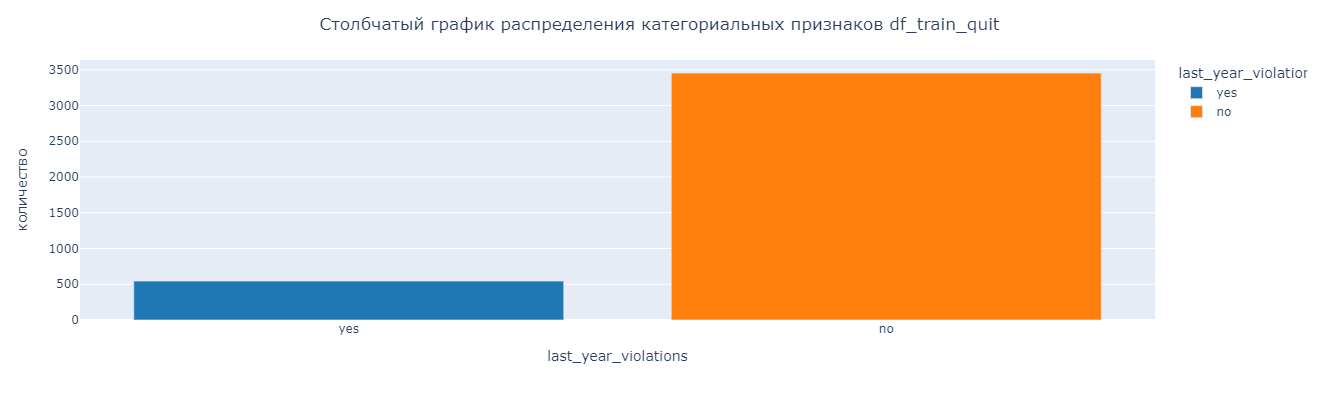

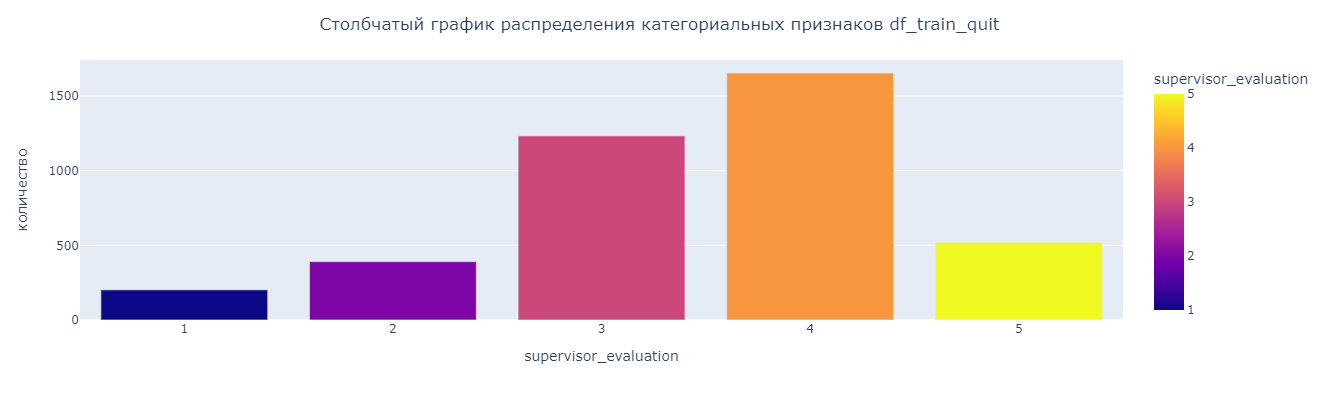

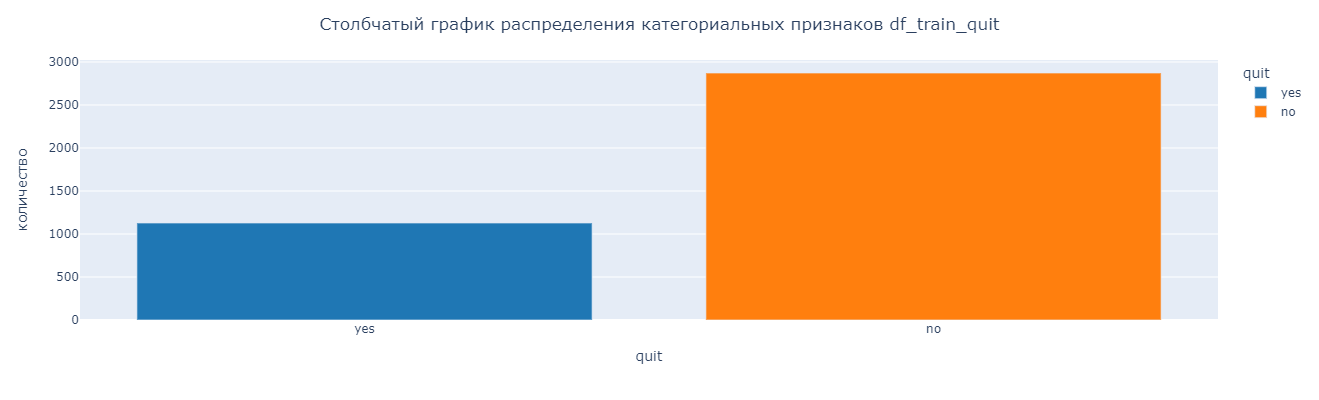

In [141]:
columns =df_train_quit.drop(['id','salary'],axis=1).columns.tolist()

for i, column in enumerate (columns):
    data = df_train_quit.pivot_table(index=column, values='id',aggfunc='count').sort_values(by='id').reset_index()
    
    # sns.barplot(data=data, x=column, y='id', ax=axes[i//2,i%2])
    fig =px.bar(data, x=column , y='id', color=column, 
         color_discrete_sequence=px.colors.qualitative.D3,width=800, height=400)
    fig.update_layout(title='Столбчатый график распределения категориальных признаков ''df_train_quit', title_x=0.5)
    fig.update_yaxes(title_text='количество')
    fig.show()

1. Столбец `dept
- наиболее частое значение в категории 'sales'-1438,наименее 'hr'-464.

2. Столбец 'last_year_promo'
-сильный дисбаланс классов: значение 'no' составляет 97% от общего количества наблюдений. Вероятно этот
признак будет несущественным для обучения модели.

3. Столбец 'last_year_violations'
-сильный дисбаланс классов: значение 'no' составляет 86% от общего количества наблюдений.

4. Столбец 'level'.
- наиболее часто встречающиеся значения 'junior'-1949 и 'middle'-1694, наименее 'sinior'- 357.

5. Столбец 'supervisor_evaluation'
- наиболее частая оценка - '4' - 1603 самая редкая '1'' - 201.
- 
6.Столбец  'workload'
- наиболее частое значение в категории 'medium'-2118,наименее 'high'-674., знаачение 'low'встречается 1208 раз.

Во всех признаках наблюдается дисбаланс классов, особенно существенно это для целевого признака.  
Для учета этого фактора в обучении модели мы планируем использовать параметр class_weight='balanced'.
Также возможно исключения из числа входных признаков 'last_year_promo'.

Изучим взаимосвязь между признаками в датафрейме `df_train_quit`, расчитаем коэффициенты корреляции между всеми признаками. Данные включают как категориальные так и количественные признаки. В исследовательском анализе данных было выявлено, что количественные признаки не имеют нормального распределения. В таких случаях для определения корреляции между переменными наиболее подходящим выбором является использование коэффициента Фи.

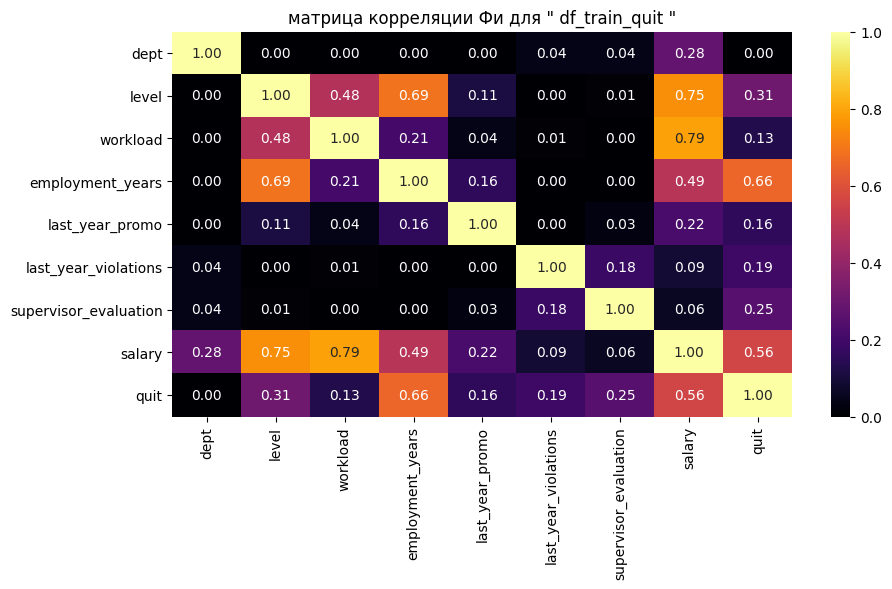

In [142]:
# interval_cols=['salary'] - список количественных признаков
data=df_train_quit.drop('id',axis=1).phik_matrix(interval_cols=['salary']).round(2)

plt.figure(figsize=(10, 5))
sns.heatmap(data, annot=True, fmt='.2f',cmap='inferno')
plt.title('матрица корреляции Фи для " df_train_quit "')
plt.show()

Мы не обнаружили мультиколлинеарности между признаками. 
Кроме того, наблюдается нулевая корреляция между целевым признак и 'dept'. Следует отметить, что значительная сильная положительная корреляция целевого признака наблюдается с 'employment_years' (0.66). Умеренная корреляция с признаком 'salary' (0.56).
Слабая корреляция c признаками 'supervisor_evaluation', 'level'.

Составим портрет уволившегося сотрудника.

Объединим данные из  тестовой выборки и два целевых признака в датасет `df_test_total`

In [143]:
df_test_total = df_test_job.merge(df_target_job, on='id', how='left')
df_test_total = df_test_total.merge(df_target_quit, on='id', how='left')

In [144]:
df_train_quit.head()

id        dept   level workload  employment_years last_year_promo  \
0  723290       sales  middle     high                 2              no   
1  814010       sales  junior   medium                 2              no   
2  155091  purchasing  middle   medium                 5              no   
3  257132       sales  junior   medium                 2              no   
4  910140   marketing  junior   medium                 2              no   

  last_year_violations  supervisor_evaluation  salary quit  
0                   no                      4   54000   no  
1                   no                      4   27600   no  
2                   no                      1   37200   no  
3                  yes                      3   24000  yes  
4                   no                      5   25200   no

Создадим функцию, вычисляющую процент уволившихся по значениям в каждом категориальном признаке.

In [145]:
def quit_analysis ( df):
    # Разделим датафрем по значениям признака'quit'
    df_no = df.query('quit=="no"').drop('quit', axis=1)
    df_yes = df.query('quit=="yes"').drop('quit', axis=1)

    # Создадим список столбцов категориальных признаков, добавив в него 'supervisor_evaluation'.
    column = df_no.select_dtypes(include='object').columns.to_list()
    # column.append('supervisor_evaluation','employment_years')
    column.extend(['supervisor_evaluation', 'employment_years'])
    # Преобразуем датафремы в длинный формат.
    df_no_long = df_no[column].melt(var_name='category', value_name='value_category')
    df_yes_long = df_yes[column].melt(var_name='category', value_name='value_category')

    # Агрегируем датафрейм по категориям и значениям категорий , вычислим количество работающих сотрудников.
    df_agg_no= df_no_long.groupby(by=['category','value_category',])\
    [['value_category']].count()
    df_agg_no.columns = ['value_no']
    df_agg_no.reset_index(inplace=True)
    # Агрегируем датафрейм по категориям и значениям категорий , вычислим количество уволенных сотрудников.
    df_agg_yes= df_yes_long.groupby(by=['category','value_category',])\
    [['value_category']].count()
    df_agg_yes.columns = ['value_yes']
    df_agg_yes.reset_index(inplace=True)

    # Объеденим данные в одну таблицу.
    df_agg_final= df_agg_yes.merge(df_agg_no, on=['category','value_category'], how='left')

    # Добавим столбец  спроцентом уволившихся от общего числа сотрудников по значениям в категориях.
    df_agg_final['quit_rate'] = df_agg_final.apply(lambda x: round((x['value_yes']/(x['value_yes']+x['value_no'])),2)*100, axis=1)
    return df_agg_final
    

Визуализируем процент уволившихся по  значению в каждом  признаке.

last_year_promo


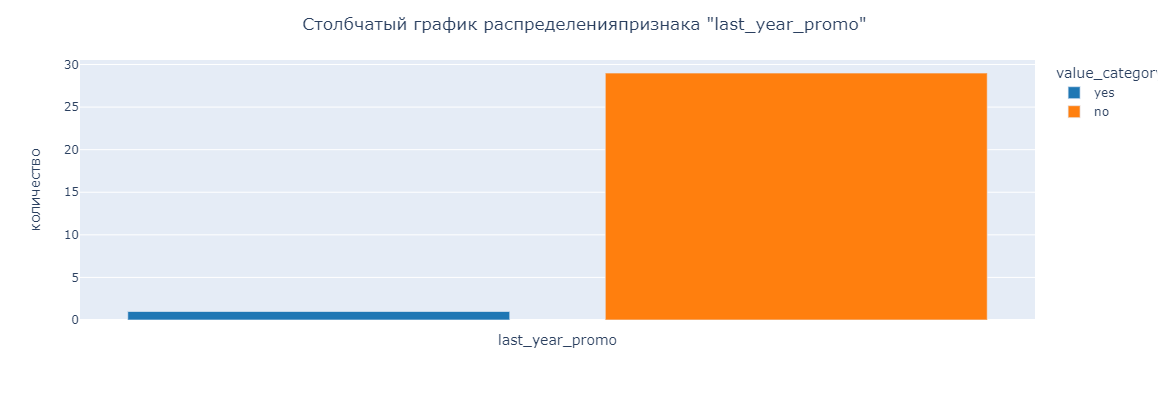

employment_years


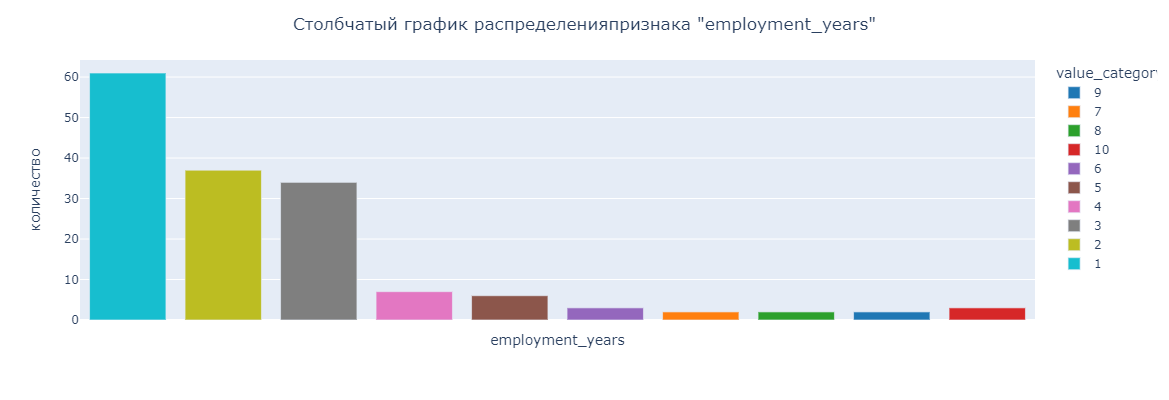

level


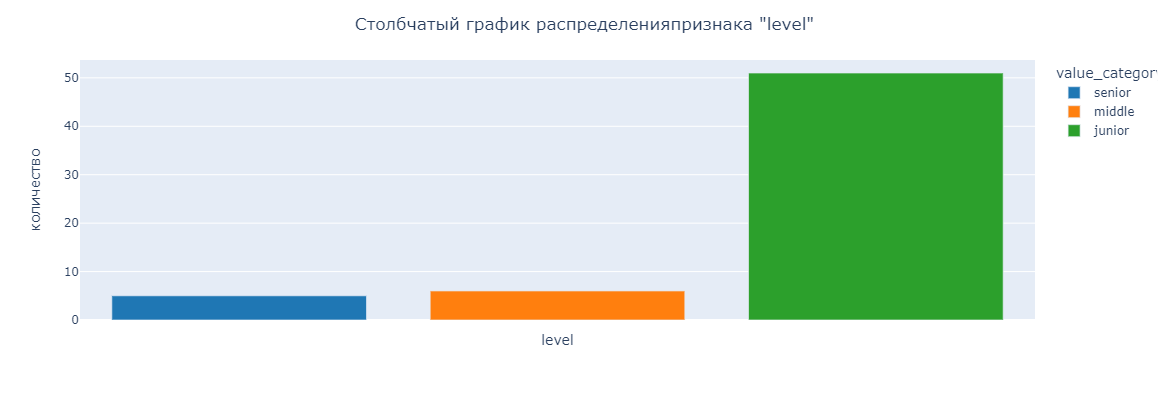

supervisor_evaluation


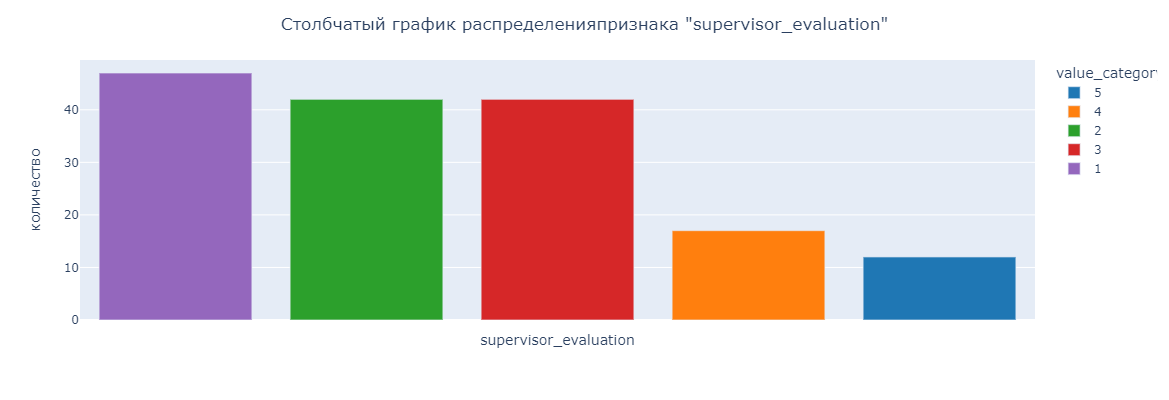

workload


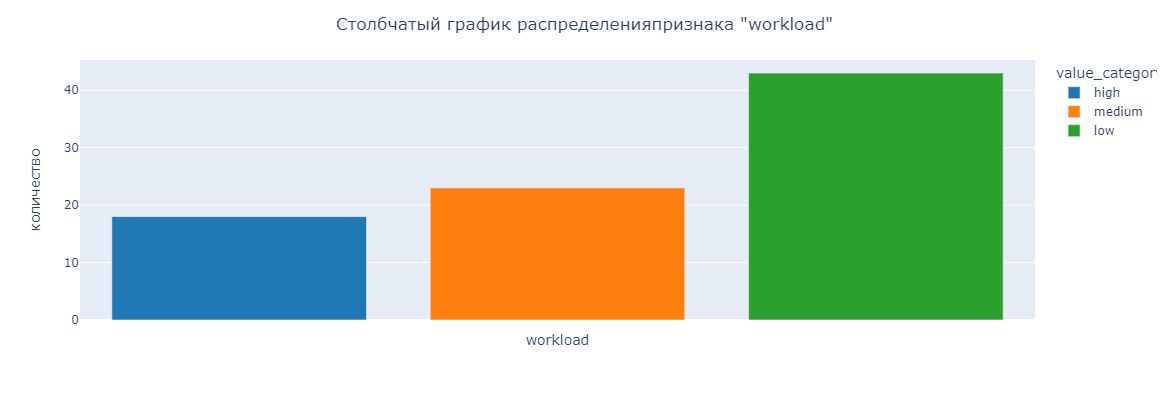

dept


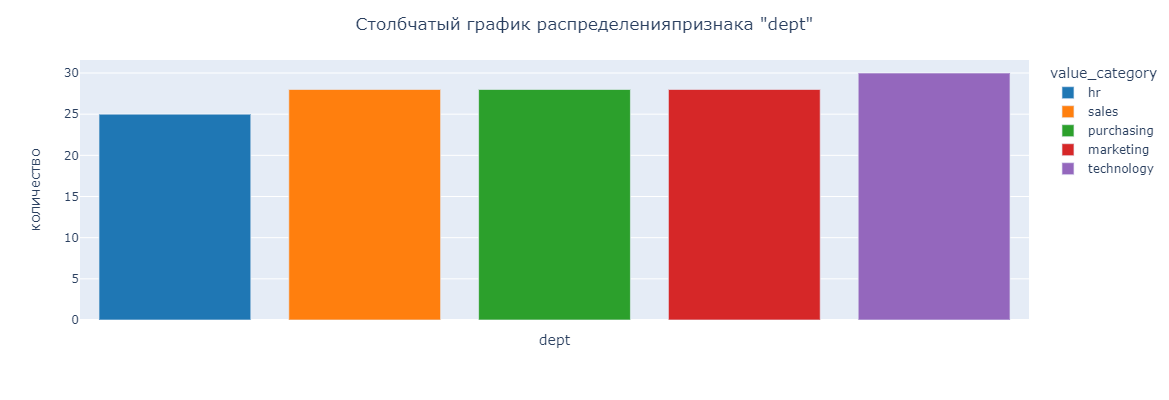

last_year_violations


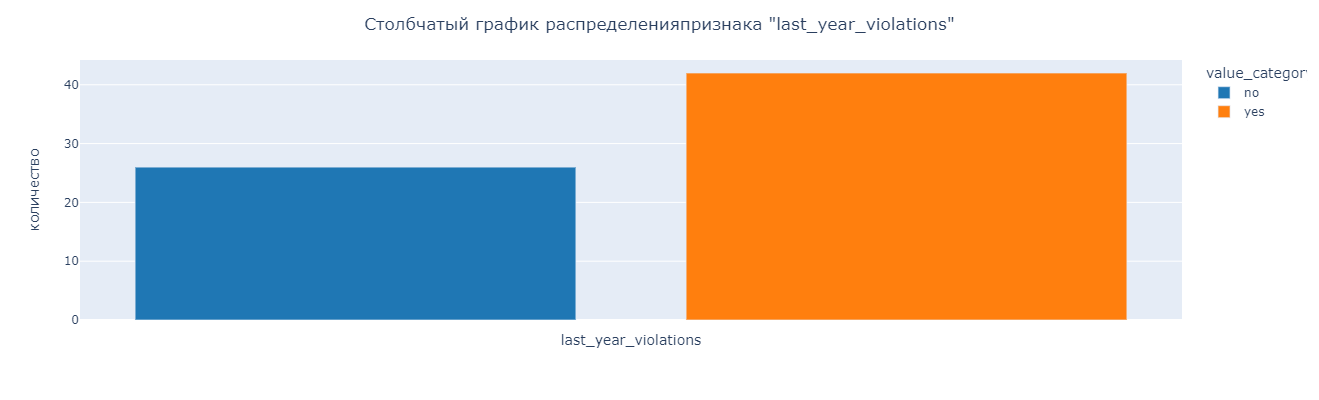

In [146]:
# columns =df_train_quit.drop(['id','salary',],axis=1).columns.tolist()
data = quit_analysis(df_train_quit).sort_values(by='quit_rate')
for uniq in  (data['category'].unique()):
    # data = df_train_quit.pivot_table(index=column, values='id',aggfunc='count').sort_values(by='id').reset_index()
    print(uniq)
    # sns.barplot(data=data, x=column, y='id', ax=axes[i//2,i%2])
    fig =px.bar(data[data['category']== uniq], x= 'value_category', y='quit_rate', color='value_category', 
         color_discrete_sequence=px.colors.qualitative.D3,width=800, height=400)
    fig.update_layout(title=f'Столбчатый график распределенияпризнака "{uniq}"' , title_x=0.5)
    fig.update_yaxes(title_text='количество')
    fig.update_xaxes(title_text= uniq, showticklabels=False)
    fig.show()

Из результатов анализа следует:

1. Примерно 30% сотрудников уволились вне зависимости от отдела.
2. Среди тех, кто не получил повышения за последний год, 30% уволились, в то время как среди получивших повышение этот процент менее 5%.
3. Среди уволившихся 42% нарушали трудовой договор, в сравнении с 26% среди тех, кто не нарушал.
4. В категории 'junior' доля уволившихся 50%
5. Наибольшее количество уволившихся было среди тех, кто имел низкий уровень загруженности на работе.
6. Среди уволившихся сотрудников чаще встречаются те, у кого стаж работы составляет от 1 до 3 лет.   


Исходя из вышеперечисленного, можно сделать вывод, что уволившиеся сотрудники с высокой вероятностью были в категории 'junior', имели стаж работы от 1 до 3 лет, не получали повышения за последний год и, возможно, имели низкую нагрузку на работе. Также они, вероятно, имели проблемы с трудовой дисциплиной.

Проверим, как уровень заработной платы и уровень удовлетворенности работой влияют на вероятность увольнения сотрудников.

Вычислим средние зарплаты уволившихся и оставшихся сотрудников.

In [147]:
print(f'Средняя зарплата уволившихся сотрудников:\
    {df_train_quit[df_train_quit["quit"] == "yes"]["salary"].mean().round(0)}')
print(f'Средняя зарплата оставшихся сотрудников:\
    {df_train_quit[df_train_quit["quit"] == "no"]["salary"].mean().round(0)}')

Средняя зарплата уволившихся сотрудников:    23885.0
Средняя зарплата оставшихся сотрудников:    37702.0


Сформулируем нулевую гипотезу HO:Среднее значение зарплаты у уволившихся и оставшихся не отличается. Альтернативная гипотеза Н1: Среднее значение зарплаты у уволившихся меньше чем у оставшихся сотрудников.

Проверим Н0 на уровне статитстической значимости 5%.

In [148]:
alpha= 0.05
results = st.ttest_ind(df_train_quit[df_train_quit["quit"] == "yes"]['salary'],
                       df_train_quit[df_train_quit["quit"] == "no"]['salary'],
                       alternative='less' )
print(f'значение p-value : {results.pvalue}')
if results.pvalue < alpha:
    print(f'На уровне значимости {alpha}, отвергается нулевая гипотеза H0')
else:
    print(f'Нулевая гипотеза H0:не отвергается на уровне значимости {alpha}') 

значение p-value : 1.232068933994945e-162
На уровне значимости 0.05, отвергается нулевая гипотеза H0


**Результаты статистического теста говорят о том, что средняя зарплата уволившихся сотрудников статистически значимо  меньше, чем у оставшихся**.

Построим нормированные гистограммы распределения 'salary' и 'job_satisfaction_rate'

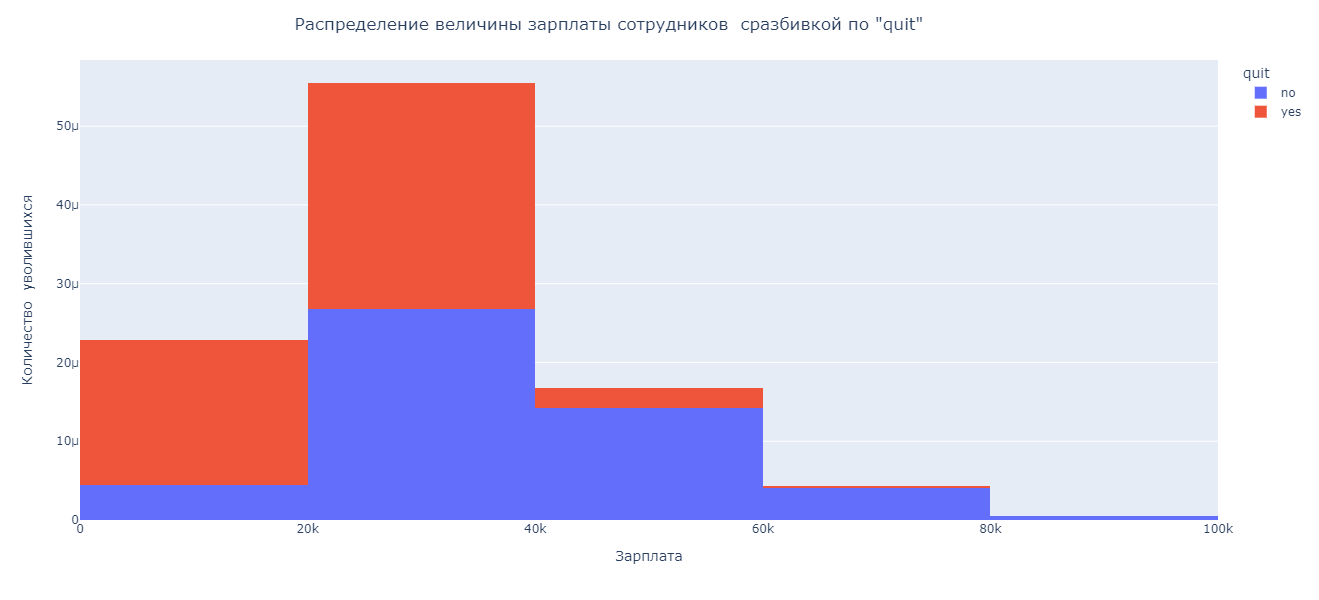

In [149]:
fig = px.histogram(df_train_quit,x='salary' , nbins=5,color='quit',width=1000, height=600,histnorm='probability density')
fig.update_xaxes(title_text='Зарплата')
fig.update_yaxes(title_text='Количество  уволившихся ')
fig.update_layout(title='Распределение величины зарплаты сотрудников  сразбивкой по "quit"', title_x=0.7)
fig.show()

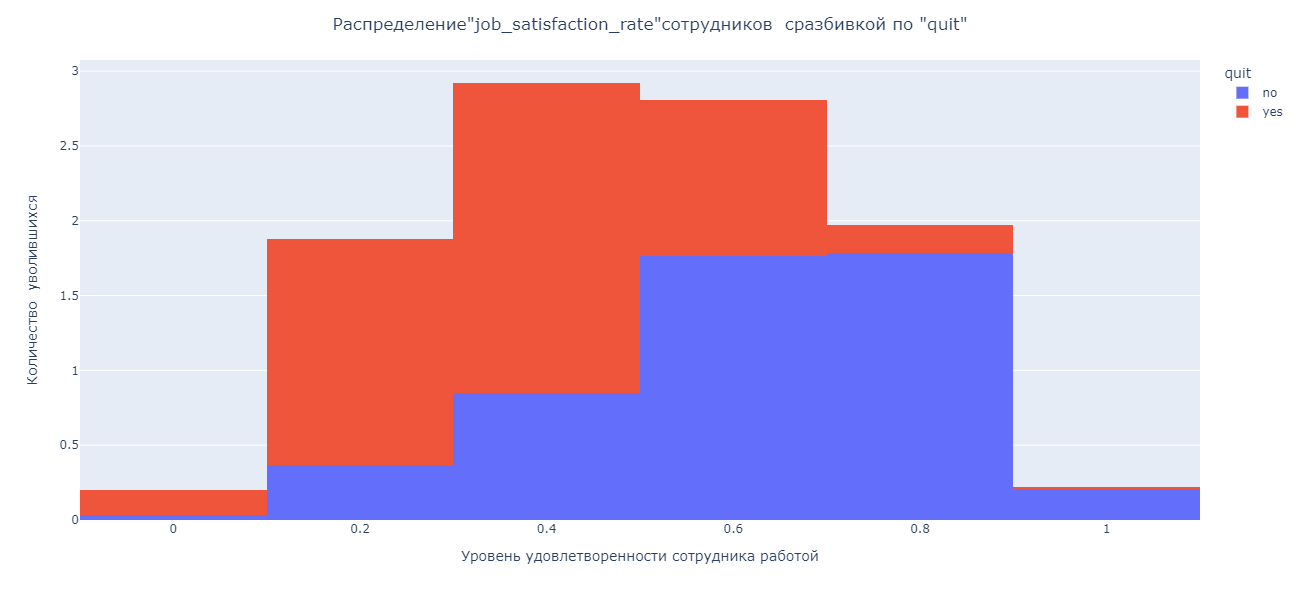

In [150]:
fig = px.histogram(df_test_total,x='job_satisfaction_rate',histnorm='probability density' , nbins=9,color='quit',width=1000, height=600)
fig.update_xaxes(title_text='Уровень удовлетворенности сотрудника работой')
fig.update_yaxes(title_text='Количество  уволившихся ')
fig.update_layout(title='Распределение"job_satisfaction_rate"сотрудников  сразбивкой по "quit"', title_x=0.5)
fig.show()

In [151]:
print(f'Средняя зарплата уволившихся сотрудников:\
    {df_test_total[df_test_total["quit"] == "yes"]["job_satisfaction_rate"].mean().round(2)}')
print(f'Средняя зарплата оставшихся сотрудников:\
    {df_test_total[df_test_total["quit"] == "no"]["job_satisfaction_rate"].mean().round(2)}')

Средняя зарплата уволившихся сотрудников:    0.39
Средняя зарплата оставшихся сотрудников:    0.61


Результаты статистического теста говорят о том, что средняя зарплата уволившихся сотрудников статистически значимо меньше, чем у оставшихся работать.

Наибольшее количество уволившихся сотрудников имело зарплату менее 40 тысяч рублей. Также, уровень удовлетворенности работой у уволившихся был ниже 0.5.

Средний уровень зарплаты среди уволившихся составил  23885 рублей, в то время как у оставшихся он составил 37702 рублей.

Относительно уровня удовлетворенности работой, средний показатель уволившихся составил 0.39, в то время как у оставшихся он был выше и составил 0.61.



**Уволившиеся сотрудники с высокой вероятностью были в категории 'junior', имели стаж работы от 1 до 3 лет, не получали повышения за последний год и, возможно, имели низкую нагрузку на работе. Также они, вероятно, имели проблемы с трудовой дисциплиной. Средняя зарплата составляет около 25000руб, уровень удовлетворенности менее 0.5**.

### <center> Добавление нового входного признака. </center>

In [152]:
df_train_quit.head()

id        dept   level workload  employment_years last_year_promo  \
0  723290       sales  middle     high                 2              no   
1  814010       sales  junior   medium                 2              no   
2  155091  purchasing  middle   medium                 5              no   
3  257132       sales  junior   medium                 2              no   
4  910140   marketing  junior   medium                 2              no   

  last_year_violations  supervisor_evaluation  salary quit  
0                   no                      4   54000   no  
1                   no                      4   27600   no  
2                   no                      1   37200   no  
3                  yes                      3   24000  yes  
4                   no                      5   25200   no

Добавим  'job_satisfaction_rate' в `df_train_quit`, для этого используем предсказание обученной модели из
первой задачи. Передадим в качестве аргумента `df_train_quit` в  **grid_search.predict()**.
Проверим результат



In [153]:
df_train_quit['job_satisfaction_rate'] = grid_search.predict(df_train_quit.drop('id',axis=1)).round(2)


In [154]:
df_train_quit.head()

id        dept   level workload  employment_years last_year_promo  \
0  723290       sales  middle     high                 2              no   
1  814010       sales  junior   medium                 2              no   
2  155091  purchasing  middle   medium                 5              no   
3  257132       sales  junior   medium                 2              no   
4  910140   marketing  junior   medium                 2              no   

  last_year_violations  supervisor_evaluation  salary quit  \
0                   no                      4   54000   no   
1                   no                      4   27600   no   
2                   no                      1   37200   no   
3                  yes                      3   24000  yes   
4                   no                      5   25200   no   

   job_satisfaction_rate  
0                   0.60  
1                   0.85  
2                   0.34  
3                   0.35  
4                   0.79

In [155]:
df_test_total.head()

id       dept   level workload  employment_years last_year_promo  \
0  485046  marketing  junior   medium                 2              no   
1  686555         hr  junior   medium                 1              no   
2  467458      sales  middle      low                 5              no   
3  418655      sales  middle      low                 6              no   
4  789145         hr  middle   medium                 5              no   

  last_year_violations  supervisor_evaluation  salary  job_satisfaction_rate  \
0                   no                      5   28800                   0.79   
1                   no                      4   30000                   0.72   
2                   no                      4   19200                   0.64   
3                   no                      4   19200                   0.60   
4                   no                      5   40800                   0.75   

  quit  
0   no  
1   no  
2   no  
3   no  
4   no

In [156]:
df_test_total['job_satisfaction_rate'] = grid_search.predict(df_test_total.drop('id',axis=1)).round(2)

In [157]:
df_test_total.head()

id       dept   level workload  employment_years last_year_promo  \
0  485046  marketing  junior   medium                 2              no   
1  686555         hr  junior   medium                 1              no   
2  467458      sales  middle      low                 5              no   
3  418655      sales  middle      low                 6              no   
4  789145         hr  middle   medium                 5              no   

  last_year_violations  supervisor_evaluation  salary  job_satisfaction_rate  \
0                   no                      5   28800                   0.88   
1                   no                      4   30000                   0.68   
2                   no                      4   19200                   0.69   
3                   no                      4   19200                   0.71   
4                   no                      5   40800                   0.81   

  quit  
0   no  
1   no  
2   no  
3   no  
4   no

### <center> Подготовка данных и обучение модели. </center>

Подготовим признаки для обучения модели:
1. Отмасштабируем количественные признаки:`employment_years` и `salary` 
2. Ранговые категориальные признаки `level`,`workload`, `supervisor_evaluation`закодируем с помощью OrdinalEncoder.
3. `last_year_promo	`,`last_year_violations` закодируем c помощью OneHotEncoder.
4. Столбецы 'id' 'dept' исключим из списка признаков
5. Заполним появившиеся пропуски c помощью SimplImputer.

Для тренировоченой воборки:
cохраним целевой признак в переменную **y_train_quit**, входные признаки в переменную **X_train_quit**.

Для тестовых данных:
cохраним целевой признак в переменную **y_test_quit**, входные признаки в переменную **X_test_quit**.
.

Сформируем списки признаков для кодировщиков и скейлеров:
- columns_num_quit - список признаков для масштабирования;
- columns_ohe_quit - список признаков для кодирования OneHotEncoder;
- columns_ord_quit - список признаков для кодирования OrdinalEncoder.
- categories_quit - список ранговых значений для OrdinalEncoder.

In [158]:
df_train_dub =  df_train_quit.drop('id',axis=1).drop_duplicates()
print(f'Количество явных неполных дубликатов,без "id": { df_train_dub.duplicated().sum()}')

Количество явных неполных дубликатов,без "id": 0


In [159]:
X_train_quit = df_train_dub.drop(['quit','dept'],axis=1)
y_train_quit = df_train_dub['quit']

`df_test_total` был создан путем объединения трех таблиц по столбцу 'id', мы можем использовать его для подготовки тестовых данных.

In [160]:
df_test_total.head()

id       dept   level workload  employment_years last_year_promo  \
0  485046  marketing  junior   medium                 2              no   
1  686555         hr  junior   medium                 1              no   
2  467458      sales  middle      low                 5              no   
3  418655      sales  middle      low                 6              no   
4  789145         hr  middle   medium                 5              no   

  last_year_violations  supervisor_evaluation  salary  job_satisfaction_rate  \
0                   no                      5   28800                   0.88   
1                   no                      4   30000                   0.68   
2                   no                      4   19200                   0.69   
3                   no                      4   19200                   0.71   
4                   no                      5   40800                   0.81   

  quit  
0   no  
1   no  
2   no  
3   no  
4   no

In [161]:
X_test_quit= df_test_total.drop(['id','dept','quit'],axis=1)
y_test_quit = df_test_total['quit']

In [162]:
X_test_quit.head()

level workload  employment_years last_year_promo last_year_violations  \
0  junior   medium                 2              no                   no   
1  junior   medium                 1              no                   no   
2  middle      low                 5              no                   no   
3  middle      low                 6              no                   no   
4  middle   medium                 5              no                   no   

   supervisor_evaluation  salary  job_satisfaction_rate  
0                      5   28800                   0.88  
1                      4   30000                   0.68  
2                      4   19200                   0.69  
3                      4   19200                   0.71  
4                      5   40800                   0.81

Закодируем целевой признак.

Значение старшего класса  совпадает с предсказываемым значением.


In [163]:
label_encoder = LabelEncoder()
у_train_quit = label_encoder.fit_transform(y_train_quit)
label_encoder.classes_

array(['no', 'yes'], dtype=object)

In [164]:
у_test_quit = label_encoder.transform(y_test_quit)
у_test_quit

array([0, 0, 0, ..., 1, 0, 0])

In [165]:
X_train_quit.columns

Index(['level', 'workload', 'employment_years', 'last_year_promo',
       'last_year_violations', 'supervisor_evaluation', 'salary',
       'job_satisfaction_rate'],
      dtype='object')

In [166]:
columns_ohe_quit  = ['last_year_promo', 'last_year_violations']
columns_ord_quit = ['level', 'workload', ]
columns_num_quit = ['employment_years', 'salary']
categories

[['junior', 'middle', 'senior'], ['low', 'medium', 'high']]

In [167]:
print(f'categories: { categories}')
print(f'columns_num_quit :{columns_num_quit}')
print(f'columns_ohe_quit :{columns_ohe_quit}')
print(f'columns_ord_quit :{columns_ord_quit}')

categories: [['junior', 'middle', 'senior'], ['low', 'medium', 'high']]
columns_num_quit :['employment_years', 'salary']
columns_ohe_quit :['last_year_promo', 'last_year_violations']
columns_ord_quit :['level', 'workload']


In [168]:
# Создадим пайплайн подготовки данных, используя ColumnTransformer


data_preprocessor_quit = ColumnTransformer(
    [
        ('ohe', ohe_pipe, columns_ohe_quit),
        ('ord', ord_pipe, columns_ord_quit),
        ('num', num_pipe, columns_num_quit)
    ],
    remainder='passthrough'
)


pipe_final_quit = Pipeline(
    [
       
        ('preprocessor', data_preprocessor_quit),
    ('model', KNeighborsClassifier())
    ]
)    

In [169]:
pipe_final_quit

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('ohe_pipe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(steps=[('ord_pipe',
                                                                   OrdinalEncoder(categories=[['junior',
                                                                                               'middle',
                                                                                               'senior'],
                                                                                              ['low',
                                                                                               'medium',
                                                                                               'high']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan)),
                                                                  ('imputer',
                                                                   Pipeline(steps=[('simple_imputer',
                                                                                    SimpleImputer(strategy='most_frequent'))]))]),
                                                  ['level', 'workload']),
                                                 ('num',
                                                  Pipeline(steps=[('num',
                                                                   StandardScaler())]),
                                                  ['employment_years',
                                                   'salary'])])),
                ('model', KNeighborsClassifier())])

Обучим три модели для классификации: SCV,  KNeighborsClassifier, DecisionTreeClassifier.

In [170]:


param_model_quit= [
       
       # словарь для  модели SVC

      { 
         'model':[ SVC(random_state=RANDOM_STATE, probability=True)],
         'model__kernel':['rbf','sigmoid', 'linear'],
         'model__C': np.linspace(0.1, 10, 10),
         'model__gamma': np.linspace(0.1, 10, 10),
          
        },

        # словарь для модели KNN
        
        {
          'model':[ KNeighborsClassifier()],
          'model__n_neighbors': range(5,11),
          'model__p': [1,2],
          },
         
        # словарь для модели DecisionTreeClassifier
        
        {
          'model':[DecisionTreeClassifier(random_state=RANDOM_STATE)],
          'model__max_depth': range(2,6),  
          'model__min_samples_split': range(2,9),
          'model__min_samples_leaf' : range(1,6)
         } 
]


In [171]:

grid_search_quit = GridSearchCV(
    pipe_final_quit, 
    param_model_quit, 
    cv=5,
    scoring = 'roc_auc',
    n_jobs=-1,
    
)

In [172]:
start_time = time.time()
grid_search_quit.fit(X_train_quit, y_train_quit)
end_time = time.time()
print(f'Время работы GridSearchCV: {round((end_time - start_time),0)} секунд')

Время работы GridSearchCV: 571.0 секунд


In [173]:
clf_model = grid_search_quit.best_estimator_.named_steps['model']
clf_model

KNeighborsClassifier(n_neighbors=10, p=1)

In [174]:
print ('Метрика roc_auc лучшей модели полученная с помощью кросс-валидации:', grid_search_quit.best_score_)
print('Параметры лучшей модели:', grid_search_quit.best_params_)


Метрика roc_auc лучшей модели полученная с помощью кросс-валидации: 0.9051154420333912
Параметры лучшей модели: {'model': KNeighborsClassifier(), 'model__n_neighbors': 10, 'model__p': 1}


In [175]:
y_test_pred = grid_search_quit.predict_proba(X_test_quit)[:,1]

In [176]:
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test_quit, y_test_pred):.4f}')

Метрика ROC-AUC на тестовой выборке: 0.9196


In [177]:
# Подготовим данные  в шаге `preprocessor`.
X_test_prepare_quit = grid_search_quit.best_estimator_.named_steps['preprocessor'].transform(X_test_quit)
X_train_prepare_quit = grid_search_quit.best_estimator_.named_steps['preprocessor'].transform(X_train_quit)
dummy_classifier = DummyClassifier()
model_dummy_quit = dummy_classifier.fit(X_train_prepare_quit, у_train_quit)
y_pred_dummy_quit= model_dummy_quit.predict_proba(X_test_prepare_quit)[:,1]
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test_quit, y_pred_dummy_quit):.4f}')

Метрика ROC-AUC на тестовой выборке: 0.5000



Результаты оценки адекватности модели с помощью DummyClassifier показали, что значение метрики ROC-AUC на тестовой выборке составило 0.5000. В то же время, метрика ROC-AUC на тестовой выборке для реальной модели составила 0.9193. Это свидетельствует о высокой предсказательной способности нашей модели по сравнению со случайным выбором.

Создадим список моделей и выведем три наилучшие, а также лучшую из обученных моделей KNN и DecisionTree.

In [178]:
result_quit= pd.DataFrame(grid_search_quit.cv_results_).sort_values(by='rank_test_score').round(3)\
                       [['mean_fit_time','params','mean_test_score','std_test_score','rank_test_score']]
result_quit.head(3)

mean_fit_time  \
310          0.044   
308          0.050   
311          0.074   

                                                                         params  \
310  {'model': KNeighborsClassifier(), 'model__n_neighbors': 10, 'model__p': 1}   
308   {'model': KNeighborsClassifier(), 'model__n_neighbors': 9, 'model__p': 1}   
311  {'model': KNeighborsClassifier(), 'model__n_neighbors': 10, 'model__p': 2}   

     mean_test_score  std_test_score  rank_test_score  
310            0.905           0.012                1  
308            0.905           0.012                2  
311            0.902           0.011                3

In [179]:
kNN= result_quit[result_quit['params'].astype(str).str.contains('KNeighbors')]\
    .sort_values(by='rank_test_score')
DecisionTree= result_quit[result_quit['params'].astype(str).str.contains('DecisionTree')]\
    .sort_values(by='rank_test_score')
display(DecisionTree.head(1))
kNN.head(1)

mean_fit_time  \
450          0.042   

                                                                                                                                     params  \
450  {'model': DecisionTreeClassifier(random_state=50), 'model__max_depth': 5, 'model__min_samples_leaf': 5, 'model__min_samples_split': 7}   

     mean_test_score  std_test_score  rank_test_score  
450              0.9           0.016               26

mean_fit_time  \
310          0.044   

                                                                         params  \
310  {'model': KNeighborsClassifier(), 'model__n_neighbors': 10, 'model__p': 1}   

     mean_test_score  std_test_score  rank_test_score  
310            0.905           0.012                1

Как видим  три лучшие модели это SVC. Модель kNN занимает 10 строчку рейтинга, DecisionTree 17 строчку.

Выводы:

Для обучения были выбраны три модели : 
1. Дерево решений  DecisionTreeClassifier.
2. Метод опорных векторов  SVC.
3. модель k-ближайших соседей KNeighborsClassifier.

Для поиска оптимальной модели был применен алгоритм GridSearchCV для поиска оптимальной модели. Оценка
качества проверялась метрикой ROC-AUC.

Наиболее высокие результаты показала модель SVC со следующими гиперпараметрами:  
C =, gamma=0.1, kernel=rbf.

На тестовых данных ROC-AUC показала результат 0.9197.

Одной из причин по которой модель SVC могла показать лучший результат - наличие неленейного ядра
rbf. Это позволяет  более точно учитывать возможные нелиненые зависимости в данных.

## <center> Общий вывод. </center>

Заказчиком были поставлены две задачи:
1. Построить модель для предсказания уровня удовлетворенности сотрудника работой, были предоставлены
данные для обучения и тестирования модели.
Для оценки  качества модели  исппользовали пользовательскую метрику SMAPE
Критерий качества SMAPE <=15 на тестовой выборке.
2. Построить модель для предсказания увольнения сотрудника, были предосталены данные для обучения,  и  тестовые данные целевого признака, входные тестовые признаки  предполагалось использоавать из задачи №1.
Для оценки  качества модели  исппользовали метрику ROC_AUC.
Критерий качества ROC_AUC>=0.91 на тестовой выборке.


Задача №1.

Решение задачи включает следующие шаги:
1. Предобработка данных.
 
В результате предобрабтки данных  в пайплайне, используя алгоритм SimpleImputer были заполнены пропуски в таблицах `df_train_job` и `df_test_job` на значение моды, провернены данные на дубликаты.
Обнаруженые неполные явные дубликаты, и "пустые" '' значения в категориальных данных  обработаны
 на этапе подготовки данных.

2. Исследовательский анализ данных.

После проведения исследовательского анализа было обнаружено, что данные не содержат критических аномалий или выбросов, тренировочные и тестовые наборы данных имеют схожую структуру. Также обнаружено, что отсутствует мультиколлинеарность между признаками, и не наблюдается явной линейной зависимости при визуализации данных на графиках рассеяния (scatterplot).
Установленно, что все категориальные признаки содержат дисбаланс классов.

3. Подготовка данных и обучение модели.

Для решения задачи регрессии оказалась лучшей модель  DecisionTreeRegressor с параметрами:

- max_depth=17,
- min_samples_leaf=3,
- min_samples_split=2
Значение метрика SMAPE на тестовой выборке: 13.5263 при обозначенном целевом значениии <=15.
Лучшая регрессионная линейная модель  ElasticNet на тестовой выборке показала значение SMAPE=24,75",
что значительно хуже.
Пять наиболее важных признаков обученной модели:
- 'supervisor_evaluation' - 0.67.
- 'salary' - 0.09
- 'employment_years' 0.07
- 'last_year_violations' -0.05
- 'level' - 0.05



Задача №2

1. Предобработка данных.

После проведения исследовательского анализа было обнаружено, что данные не содержат критических аномалий или выбросов, тренировочные и тестовые наборы данных имеют схожую структуру.
Обнаруженые неполные явные дубликаты,  обработаны на этапе подготовки данных.

2. Исследовательский анализ данных.

После проведения исследовательского анализа было обнаружено, что данные не содержат критических аномалий или выбросов, и тренировочные и тестовые наборы данных имеют схожую структуру. Также обнаружено, что отсутствует мультиколлинеарность между признаками.
Установленно, что все категориальные признаки, включая целевой признак содержат дисбаланс классов.
Для корректного учета этого фактора в моделях был использован параметр class_weight='balanced'.

По итогам анализа был составлен 'портрет' уволившегося сотрудника:

Уволившиеся сотрудники с высокой вероятностью были в категории 'junior', имели стаж работы от 1 до 3 лет, не получали повышения за последний год и, возможно, имели низкую нагрузку на работе. Также они, вероятно, имели проблемы с трудовой дисциплиной. Средняя зарплата составляет около 25000руб, уровень удовлетворенности менее 0.5.

3.Добавление нового признака.

Добавили  признак 'job_satisfaction_rate' в ` df_train_quit`, для этого используем предсказание обученной модели из первой задачи. 

4. Подготовка данных и обучение модели.

   
Наиболее высокие результаты показала модель SVC со следующими гиперпараметрами:  
C =2.194736842105263, gamma=0.1, 'model=rbf

На тестовых данных ROC-AUC  модель показала результат 0.9197.


Рекомендации и предложения:
- Возможно, что сотрудники в категории 'junior'  не получают достаточной поддержки для развития своих профессиональных навыков. Это может требовать дополнительного внимания со стороны руководства, возможно
внедрение системы наставничества.
- 
- Отсутствие повышения за последний год может стать фактором ухода из компании. Это может указывать на недостаточную систему мотивации сотрудников. Стоит пересмотреть ситему поощрений, принятую  в компании.
- 
- Сотрудники с низким уровнем  зарплаты чаще увольняются. Это может указывать на несоответствие ожиданий и реальных условий работы. Необходимо  проанализировать и откорректировать системы вознаграждения и условия труда.